# Model DBSCAN

This Jupyter notebook is used to:

1. Run PCA.
2. Run DBSCAN.
3. Visualize results.

## 0. Load the data

In [1]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/0_tuesday/ssh_patator/final.csv


originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            1.00000           0.85685          0.77611              0.00005   
1            1.00000           0.85685          0.85504              0.00010   
2            1.00000           0.76639          0.16642              0.00010   
3            1.00000           0.76639          0.16704              0.00020   
4            1.00000           0.21599          0.54411              0.00020   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.94024                0.01245                   0.03605   
1            0.94096                0.00088                   0.01432   
2            0.92881                0.00690                   0.00880   
3            0.92891                0.01703                   0.02154   
4            0.93800                0.00872                   0.01401   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.03514            0.00215                0.00046  ...   
1               0.02432            0.00028                0.00006  ...   
2               0.00743            0.00695                0.00039  ...   
3               0.01824            0.00695                0.01428  ...   
4               0.01486            0.00695                0.01224  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol             service  \
0        4868                      32       tcp  smb,gssapi,dce_rpc   
1        1910                      28       tcp                 ftp   
2        1663                       6       tcp                 ssl   
3       51530                      41       tcp                 ssl   
4       43967                      31       tcp                 ssl   

   conn_state       orig_p_cat       resp_p_cat  attacker_label  victim_label  \
0          SF  orig_reg_or_dyn  resp_well_known              No           Yes   
1          SF  orig_reg_or_dyn          resp_21              No           Yes   
2          SF  orig_reg_or_dyn         resp_443              No            No   
3          SF  orig_reg_or_dyn         resp_443              No            No   
4          SF  orig_reg_or_dyn         resp_443              No            No   

                     timestamp  
0  2017-07-04T18:08:16.759946Z  
1  2017-07-04T18:10:38.812648Z  
2  2017-07-04T17:49:59.530842Z  
3  2017-07-04T17:50:00.652192Z  
4  2017-07-04T18:01:19.250643Z  

[5 rows x 300 columns]

In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            1.00000           0.85685          0.45853              0.00004   
1            1.00000           0.85685          0.48580              0.00003   
2            1.00000           0.85685          0.42797              0.00008   
3            1.00000           0.08312          0.48513              0.06931   
4            1.00000           0.85685          0.46120              0.00009   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.95348                0.00054                   0.00057   
1            0.79615                0.00172                   0.00196   
2            0.05753                0.00070                   0.00087   
3            0.89465                0.00861                   0.01136   
4            0.93279                0.00055                   0.00057   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.00068            0.00079                0.00003  ...   
1               0.00270            0.00079                0.00005  ...   
2               0.00135            0.00079                0.00008  ...   
3               0.01284            0.00122                0.00113  ...   
4               0.00068            0.00079                0.00004  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol  service  conn_state  \
0         149                       1       udp      dns          SF   
1         244                       2       udp      dns          SF   
2         320                       2       udp      dns          SF   
3        4789                      18       tcp     http          SF   
4         172                       1       udp      dns          SF   

        orig_p_cat  resp_p_cat  attacker_label  victim_label  \
0  orig_reg_or_dyn     resp_53              No            No   
1  orig_reg_or_dyn     resp_53              No            No   
2  orig_reg_or_dyn     resp_53              No            No   
3  orig_reg_or_dyn     resp_80              No            No   
4  orig_reg_or_dyn     resp_53              No            No   

                     timestamp  
0  2017-07-04T17:58:45.242724Z  
1  2017-07-04T17:59:34.308285Z  
2   2017-07-04T17:57:50.24081Z  
3  2017-07-04T17:59:33.103756Z  
4  2017-07-04T17:58:50.043202Z  

[5 rows x 300 columns]

In [4]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 18602 rows and 300 columns


In [5]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

originated_ip_num  responded_ip_num  connection.time  \
count        18602.00000       18602.00000      18602.00000   
mean             0.98908           0.72294          0.46017   
std              0.04104           0.24925          0.30926   
min              0.00000           0.00000          0.00000   
25%              1.00000           0.76639          0.16186   
50%              1.00000           0.85685          0.46168   
75%              1.00000           0.85685          0.70956   
max              1.00000           1.00000          1.00000   

       connection.duration  connection.orig_p  connection.orig_bytes  \
count          18602.00000        18602.00000            18602.00000   
mean               0.00851            0.75585                0.00683   
std                0.02620            0.26045                0.02077   
min                0.00000            0.00000                0.00000   
25%                0.00001            0.73217                0.00057   
50%                0.00004            0.85892                0.00084   
75%                0.00304            0.92930                0.00742   
max                1.00000            1.00000                1.00000   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
count               18602.00000           18602.00000        18602.00000   
mean                    0.00812               0.00648            0.00374   
std                     0.02381               0.02089            0.03002   
min                     0.00000               0.00000            0.00000   
25%                     0.00077               0.00135            0.00079   
50%                     0.00100               0.00135            0.00079   
75%                     0.00957               0.00811            0.00212   
max                     1.00000               1.00000            1.00000   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
count            18602.00000               18602.00000           18602.00000   
mean                 0.00246                   0.00257               0.00544   
std                  0.02120                   0.02132               0.02097   
min                  0.00000                   0.00000               0.00000   
25%                  0.00003                   0.00005               0.00096   
50%                  0.00006                   0.00008               0.00096   
75%                  0.00079                   0.00114               0.00481   
max                  1.00000                   1.00000               1.00000   

        dns_count   ssh_count  http_count   ssl_count  files_count  \
count 18602.00000 18602.00000 18602.00000 18602.00000  18602.00000   
mean      0.56107     0.07112     0.06687     0.20433      0.01588   
std       0.49627     0.25703     0.24981     0.40322      0.04209   
min       0.00000     0.00000     0.00000     0.00000      0.00000   
25%       0.00000     0.00000     0.00000     0.00000      0.00000   
50%       1.00000     0.00000     0.00000     0.00000      0.00000   
75%       1.00000     0.00000     0.00000     0.00000      0.00000   
max       1.00000     1.00000     1.00000     1.00000      1.00000   

       orig_orig_total  orig_orig_connection.time_mean  \
count      18602.00000                     18602.00000   
mean           0.42960                         0.45711   
std            0.27657                         0.30954   
min            0.00000                         0.00000   
25%            0.19492                         0.16488   
50%            0.34355                         0.44667   
75%            0.64537                         0.72705   
max            1.00000                         1.00000   

       orig_orig_connection.duration_mean  \
count                         18602.00000   
mean                              0.24039   
std                               0.18992   
min                               0.00000   
25%  

In [6]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [7]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [9]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                         CONN_APP_STATS + 
                         OHE_ORIG_P_CAT_COLS + 
                         OHE_RESP_P_CAT_COLS + 
                         OHE_PROTO_CAT_COLS + 
                         OHE_SERVICE_CAT_COLS + 
                         OHE_CONN_STATE_CAT_COLS + 
                         
                         # originator neighbourhood
                         ORIG_ORIG_NUMERICAL_COLS + 
                         ORIG_ORIG_PORTS_COLS + 
                         ORIG_ORIG_APP_STATS_COLS + 
                         ['orig_orig_similar_conns_count'] + 
                         # originator categorical neighbourhood 
                         ORIG_ORIG_OHE_CAT_COLS + 
                         
                         # originator neighbourhood 2 
                         ORIG_RESP_NUMERICAL_COLS + 
                         ORIG_RESP_PORTS_COLS + 
                         ORIG_RESP_APP_STATS_COLS + 
                         ['orig_resp_similar_conns_count'] + 
                         # originator categorical neighbourhood 2
                         ORIG_RESP_OHE_CAT_COLS + 
                         
                         # responder neighbourhood
                         RESP_ORIG_NUMERICAL_COLS + 
                         RESP_ORIG_PORTS_COLS + 
                         RESP_ORIG_APP_STATS_COLS + 
                         ['resp_orig_similar_conns_count'] + 
                         # responder categorical neighbourhood 
                         RESP_ORIG_OHE_CAT_COLS + 
                         
                         # responder neighbourhood 2
                         RESP_RESP_NUMERICAL_COLS + 
                         RESP_RESP_PORTS_COLS + 
                         RESP_RESP_APP_STATS_COLS + 
                         ['resp_resp_similar_conns_count'] + 
                         # responder categorical neighbourhood 2
                         RESP_RESP_OHE_CAT_COLS, axis=1)

In [10]:
df.head()

connection.time  connection.duration  connection.orig_p  \
0          0.45853              0.00004            0.95348   
1          0.48580              0.00003            0.79615   
2          0.42797              0.00008            0.05753   
3          0.48513              0.06931            0.89465   
4          0.46120              0.00009            0.93279   

   connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                0.00054               0.00068            0.00079   
1                0.00172               0.00270            0.00079   
2                0.00070               0.00135            0.00079   
3                0.00861               0.01284            0.00122   
4                0.00055               0.00068            0.00079   

   connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                0.00003               0.00048    1.00000    0.00000   
1                0.00005               0.00096    1.00000    0.00000   
2                0.00008               0.00096    1.00000    0.00000   
3                0.00113               0.00866    0.00000    0.00000   
4                0.00004               0.00048    1.00000    0.00000   

   http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0     0.00000    0.00000      0.00000                           1   
1     0.00000    0.00000      0.00000                           1   
2     0.00000    0.00000      0.00000                           1   
3     1.00000    0.00000      0.12500                           1   
4     0.00000    0.00000      0.00000                           1   

   orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                           0                    0                   0   
1                           0                    0                   0   
2                           0                    0                   0   
3                           0                    0                   0   
4                           0                    0                   0   

   resp_p_cat_resp_22  resp_p_cat_resp_443  resp_p_cat_resp_53  \
0                   0                    0                   1   
1                   0                    0                   1   
2                   0                    0                   1   
3                   0                    0                   0   
4                   0                    0                   1   

   resp_p_cat_resp_80  resp_p_cat_resp_dyn  resp_p_cat_resp_reg  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   1                    0                    0   
4                   0                    0                    0   

   resp_p_cat_resp_well_known  connection.proto_icmp  connection.proto_tcp  \
0                           0                      0                     0   
1                           0                      0                     0   
2                           0                      0                     0   
3                           0                      0                     1   
4                           0                      0                     0   

   connection.proto_udp  connection.service_dce_rpc  connection.service_dns  \
0                     1                           0                       1   
1                     1                           0                       1   
2                     1                           0                       1   
3                     0                           0                       0   
4                     1                           0                       1   

   connection.service_ftp  connection.service_ftp-data  \
0                       0                            0   
1                       0                            0   
2   

In [11]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'dns_count',
       'ssh_count',
       ...
       'resp_resp_connection.conn_state_mode_REJ',
       'resp_resp_connection.conn_state_mode_RSTO',
       'resp_resp_connection.conn_state_mode_RSTR',
       'resp_resp_connection.conn_state_mode_RSTRH',
       'resp_resp_connection.conn_state_mode_S0',
       'resp_resp_connection.conn_state_mode_S1',
       'resp_resp_connection.conn_state_mode_S3',
       'resp_resp_connection.conn_state_mode_SF',
       'resp_resp_connection.conn_state_mode_SH',
       'resp_resp_connection.conn_state_mode_SHR'],
      dtype='object', length=269)

## 1. Dimension Reduction (PCA)

In [12]:
from sklearn.decomposition import PCA

n_components = len(df.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [13]:
pca_X = pca.fit_transform(df)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 269 principal components: 1.0000000000000002


In [14]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [0.99999979]
Variance Captured by First  10 Principal Components: [0.92212656]
Variance Captured by First   7 Principal Components: [0.89097367]
Variance Captured by First   5 Principal Components: [0.85630062]
Variance Captured by First   2 Principal Components: [0.75971098]
Variance Captured by the First Principal Component:  [0.6113985]


In [15]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.34286743
Variance of connection.duration                       : 0.26853107
Variance of connection.orig_p                         : 0.09378037
Variance of connection.orig_bytes                     : 0.05453212
Variance of connection.orig_pkts                      : 0.03924092
Variance of connection.resp_p                         : 0.03243894
Variance of connection.resp_bytes                     : 0.02490978
Variance of connection.resp_pkts                      : 0.01886732
Variance of dns_count                                 : 0.01580573
Variance of ssh_count                                 : 0.01317202
Variance of http_count                                : 0.01098580
Variance of ssl_count                                 : 0.00699507
Variance of files_count                               : 0.00610466
Variance of orig_p_cat_orig_reg_or_dyn                : 0.00531930
Variance of orig_p_cat_orig_well_known                : 0.0047

In [16]:
# https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
pd.DataFrame(pca.components_, columns=df.columns)

connection.time  connection.duration  connection.orig_p  \
0           -0.00496              0.00389            0.00598   
1            0.00764             -0.00102            0.03011   
2           -0.01683             -0.00237            0.03679   
3           -0.07370             -0.00483            0.04907   
4           -0.12105             -0.00188           -0.01691   
..               ...                  ...                ...   
264         -0.00000             -0.00000           -0.00000   
265         -0.00000             -0.00000           -0.00000   
266          0.00000              0.00000            0.00000   
267         -0.00000              0.00000            0.00000   
268         -0.00000             -0.00000            0.00000   

     connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                  0.00227               0.00214            0.00078   
1                 -0.00159              -0.00130           -0.00091   
2                  0.00129               0.00049            0.00011   
3                 -0.00253              -0.00195           -0.00088   
4                 -0.00394              -0.00279           -0.00108   
..                     ...                   ...                ...   
264                0.00000              -0.00000            0.00000   
265                0.00000              -0.00000            0.00000   
266               -0.00000               0.00000           -0.00000   
267               -0.00000              -0.00000           -0.00000   
268                0.00000               0.00000           -0.00000   

     connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                  0.00128               0.00189   -0.18018    0.00330   
1                 -0.00034              -0.00125    0.09341   -0.04817   
2                 -0.00085               0.00094   -0.04688    0.16801   
3                 -0.00008              -0.00148    0.09545   -0.07306   
4                 -0.00195              -0.00294   -0.02232   -0.02651   
..                     ...                   ...        ...        ...   
264                0.00000              -0.00000    0.00000   -0.00000   
265               -0.00000              -0.00000    0.00000    0.00000   
266                0.00000              -0.00000   -0.00000    0.00000   
267               -0.00000               0.00000   -0.00000   -0.00000   
268                0.00000              -0.00000    0.00000    0.00000   

     http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0       0.03141    0.11461      0.00849                    -0.00379   
1      -0.00418   -0.02961     -0.00191                    -0.00093   
2      -0.01758   -0.09627     -0.00679                     0.00887   
3      -0.05461    0.04007     -0.00254                     0.00703   
4       0.20498   -0.29403     -0.00159                    -0.02731   
..          ...        ...          ...                         ...   
264     0.00000    0.00037     -0.00000                     0.02124   
265     0.00000    0.00000     -0.00000                     0.00000   
266     0.00000   -0.00000      0.00000                    -0.00000   
267    -0.00000   -0.00000      0.00000                    -0.00000   
268    -0.00000    0.13210      0.00000                    -0.14035   

     orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                       0.00379              0.00360             0.00003   
1                       0.00093              0.00090            -0.00126   
2                      -0.00887             -0.00818             0.00183   
3                      -0.00703             -0.00562            -0.00287   
4                       0.02731              0.02251             0.00011   
..                          ...                  ...                 ...   
264                     0.02124             -0.00343             0.02853   
265                     0.00000  

In [17]:
# pca_X = pca_X.sample(10000)

In [18]:
pca_X = pca_X.iloc[:, :150]  # take first 150 principal components
pca_X

0        1        2        3        4        5        6        7    \
0     -0.42362  3.98779  0.66277  0.27197 -0.05620 -0.07843 -0.34805 -0.18190   
1     -2.71030 -1.03378 -0.93245 -0.09593 -0.01195 -0.06284 -0.14398 -0.08055   
2     -2.71381 -1.00548 -0.93477  0.06463  0.04078  0.07883 -0.42285 -0.39498   
3      2.48923 -0.13273 -0.76215 -1.48537  1.90633 -0.38093  0.21931 -0.76331   
4     -0.42564  4.00517  0.67221  0.27399 -0.05975 -0.08210 -0.35092 -0.18134   
...        ...      ...      ...      ...      ...      ...      ...      ...   
18597 -2.77320 -1.11939 -0.85920  0.01406  0.18981  0.54888 -0.51156  0.05593   
18598  3.35319 -1.11349  0.04275  1.52379 -0.16614 -0.84619  0.74815  0.29069   
18599  1.18722  0.46743 -0.98803 -0.87023  0.46082 -1.66923 -0.03004  2.12298   
18600  3.62122 -1.15414 -0.12932  1.56396 -0.55412  0.65044  0.00286  0.59596   
18601 -2.74192 -1.06942 -0.87123 -0.12434 -0.08876 -0.23614 -0.04068 -0.05633   

           8        9        10       11       12       13       14       15   \
0      0.08839 -0.06116  0.01330 -0.04612  0.02845 -0.03933 -0.05825  0.08944   
1      0.09781  0.05723 -0.24608  0.06657 -0.10980 -0.12151  0.04326  0.24844   
2      0.16876  0.00960  0.99210 -0.61246  0.34522 -0.20158  0.06433  0.03702   
3     -0.48713  0.30591 -0.47592  0.02601  0.02497 -0.07745  0.03638  0.15632   
4      0.08695 -0.05256  0.00703 -0.05066  0.03574 -0.02744 -0.05036  0.07528   
...        ...      ...      ...      ...      ...      ...      ...      ...   
18597  0.02902  0.35914 -0.30741  0.21878 -0.10985 -0.09786  0.00239  0.12890   
18598  0.52683 -0.14788 -0.13309 -0.38413 -0.29340 -0.12582  0.05864 -0.25667   
18599 -1.33212 -0.64669  1.09458  0.31631 -0.32989 -0.25140  0.97597 -0.13567   
18600  0.47533  0.35257 -0.70712  0.41012  1.24471 -0.54964  0.05042  0.29351   
18601  0.06240 -0.03197  0.08577 -0.20392  0.06649 -0.05338 -0.19156 -0.02511   

           16       17       18       19       20       21       22       23   \
0      0.05556 -0.04446  0.17630 -0.07698  0.00914  0.00116  0.05304  0.03714   
1      0.00457 -0.07627  0.03643 -0.06081 -0.18997  0.14163 -0.02675  0.25557   
2      0.07471  0.00414 -0.13977  0.11022 -0.03867  0.12846  0.22204  0.00026   
3      0.10933 -0.13175 -0.05974 -0.00099 -0.25896 -0.19474 -0.11791  0.15710   
4      0.05748 -0.03767  0.17539 -0.07293  0.00521  0.00639  0.05905  0.02888   
...        ...      ...      ...      ...      ...      ...      ...      ...   
18597  0.06502 -0.17109  0.09223  0.16836  0.06666 -0.23348  0.06771 -0.38526   
18598  0.65374 -0.00150  0.30105  0.02943  0.27494  0.01817 -0.38951  0.08457   
18599 -0.47919 -0.42834  0.34949 -0.43861  0.18549 -0.04253  0.01326  0.01672   
18600  0.05933  0.25292  0.31199 -0.00920 -0.51547  0.10165 -0.37001  0.13990   
18601 -0.09901 -0.07563 -0.05768 -0.13539  0.36385  0.06712  0.08307  0.03883   

           24       25       26       27       28       29       30       31   \
0      0.07793 -0.28128  0.03369 -0.36297  0.02532  0.21723  0.04275 -0.02068   
1      0.02911 -0.10808 -0.00663 -0.18099 -0.04048 -0.02466 -0.02175  0.01317   
2      0.21047 -0.03905  0.00432 -0.01283  0.15262 -0.01557  0.11928  0.09315   
3     -0.05924 -0.11335 -0.02137  0.01104 -0.05223 -0.05408 -0.05654 -0.04898   
4      0.09646 -0.26183  0.03572 -0.32279  0.01576  0.18168  0.04132  0.03405   
...        ...      ...      ...      ...      ...      ...      ...      ...   
18597 -0.09524  0.30600  0.08250 -0.15600 -0.16490  0.02393 -0.02423 -0.08855   
18598  0.14743  0.08270 -0.03072 -0.22899  0.71866 -0.35151 -0.47246 -0.07226   
18599  0.01404  0.08516 -0.00699  0.10401  0.00119  0.18715  0.10528  0.06142   
18600  0.39585  0.49166 -0.45086  0.44970 -0.01837  1.00912 -0.60706 -0.24300   
18601  0.19080  0.11335  0.06838 -0.06085 -0.08300  0.17469  0.16438 -0.02351   

           32       33       34       35       36       37       38       39   \
0     -0.06070 -0.06386 -0.11452  0.16

## 2. DBSCAN

(https://towardsdatascience.com/dbscan-with-python-743162371dca)

(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan)

### Parameters of sklearn.cluster.DBSCAN: 

```
eps:
        Max distance between two samples (where one is in the neighborhood of the other), not max distances of points within a cluster.
        (default is 0.5)

min_samples:
        Num of samples in core points' neighborhood (including the point itself)
        (default is 5)

metric:
        Distance function. 
        (default is ’euclidean’, options available at sklearn.metrics.pairwise_distances)

metric_params
        Additional keyword arguments for the metric function.
        (default is None)

algorithm: 
        {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
        Alg. used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
        (default is ’auto’)
    
leaf_size:
        Leaf size passed to BallTree or cKDTree, can affect the speed of the construction and query, as well as the memory required to store the tree, optimal value depends on the nature of the problem.
        (default is 30)
 
p: 
        Power of the Minkowski metric (used when calculating distance between points).
        (default is None, if None p == 2, which is equivalent to Euclidean distance)
    
n_jobsint:
        Num of parallel jobs to run. 
        (default is None, None == 1, -1 == use all processors)
        
```

### Attributes: 

```
core_sample_indices_:
        Indices of core samples.
        
components_:
        Copy of each core sample found by training.

labels_:
        Cluster labels for each point in the dataset given to fit(), noisy samples have label -1.
        
n_features_in_:
        Num of features seen during fit.

feature_names_in_:
        Names of features seen during fit. Defined only when X has feature names that are all strings.
```

In [19]:
from datetime import datetime
# https://www.machinecurve.com/index.php/2020/12/09/performing-dbscan-clustering-with-python-and-scikit-learn/
from sklearn.cluster import DBSCAN

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
db = DBSCAN(eps=2.0, min_samples=250, n_jobs=-1)
db_fitted = db.fit(pca_X)
y_db = db.fit_predict(pca_X)
print_str = 'DBSCAN finished ({})'.format(datetime.now().strftime("%H:%M:%S"))
print(print_str)

print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 00:10:25.
DBSCAN finished (00:10:40)
Done at 00:10:40.


In [20]:
print_str

'DBSCAN finished (00:10:40)'

In [21]:
# Indices of core samples
db_fitted.core_sample_indices_

array([    0,     1,     2, ..., 18596, 18597, 18601])

In [22]:
# Copy of each core sample found by training
db_fitted.components_

array([[-4.23620283e-01,  3.98779242e+00,  6.62767595e-01, ...,
         6.94341760e-05, -1.51381477e-05, -5.94680086e-04],
       [-2.71029615e+00, -1.03378378e+00, -9.32448188e-01, ...,
         5.29885648e-04,  4.12082457e-04, -1.69064319e-04],
       [-2.71381358e+00, -1.00547836e+00, -9.34772015e-01, ...,
        -3.69228189e-04,  2.95436800e-04,  2.89782583e-04],
       ...,
       [-2.59357514e+00, -1.06968003e+00, -8.15760309e-01, ...,
        -3.66172026e-04, -3.99902595e-04, -9.83605069e-04],
       [-2.77319975e+00, -1.11939170e+00, -8.59199226e-01, ...,
        -4.84769892e-04,  6.13878599e-05, -3.29303641e-04],
       [-2.74191993e+00, -1.06941787e+00, -8.71225573e-01, ...,
         4.21884919e-04, -4.04102646e-05, -3.70914817e-04]])

In [23]:
# Number of features seen during fit
db_fitted.n_features_in_

150

In [24]:
# Noisy samples have label -1
db_fitted.labels_

array([ 0,  1,  1, ..., -1, -1,  1])

In [25]:
y_db

array([ 0,  1,  1, ..., -1, -1,  1])

In [26]:
# Add cluster labels to original dataframe
pca_X['cluster'] = y_db
pca_X['cluster_cat'] = pca_X['cluster']

# (groupby works only on category type)
pca_X['cluster_cat'] = pca_X['cluster_cat'].astype('category')

In [27]:
pca_X.head()

0        1        2        3        4        5        6        7  \
0 -0.42362  3.98779  0.66277  0.27197 -0.05620 -0.07843 -0.34805 -0.18190   
1 -2.71030 -1.03378 -0.93245 -0.09593 -0.01195 -0.06284 -0.14398 -0.08055   
2 -2.71381 -1.00548 -0.93477  0.06463  0.04078  0.07883 -0.42285 -0.39498   
3  2.48923 -0.13273 -0.76215 -1.48537  1.90633 -0.38093  0.21931 -0.76331   
4 -0.42564  4.00517  0.67221  0.27399 -0.05975 -0.08210 -0.35092 -0.18134   

         8        9       10       11       12       13       14      15  \
0  0.08839 -0.06116  0.01330 -0.04612  0.02845 -0.03933 -0.05825 0.08944   
1  0.09781  0.05723 -0.24608  0.06657 -0.10980 -0.12151  0.04326 0.24844   
2  0.16876  0.00960  0.99210 -0.61246  0.34522 -0.20158  0.06433 0.03702   
3 -0.48713  0.30591 -0.47592  0.02601  0.02497 -0.07745  0.03638 0.15632   
4  0.08695 -0.05256  0.00703 -0.05066  0.03574 -0.02744 -0.05036 0.07528   

       16       17       18       19       20       21       22      23  \
0 0.05556 -0.04446  0.17630 -0.07698  0.00914  0.00116  0.05304 0.03714   
1 0.00457 -0.07627  0.03643 -0.06081 -0.18997  0.14163 -0.02675 0.25557   
2 0.07471  0.00414 -0.13977  0.11022 -0.03867  0.12846  0.22204 0.00026   
3 0.10933 -0.13175 -0.05974 -0.00099 -0.25896 -0.19474 -0.11791 0.15710   
4 0.05748 -0.03767  0.17539 -0.07293  0.00521  0.00639  0.05905 0.02888   

        24       25       26       27       28       29       30       31  \
0  0.07793 -0.28128  0.03369 -0.36297  0.02532  0.21723  0.04275 -0.02068   
1  0.02911 -0.10808 -0.00663 -0.18099 -0.04048 -0.02466 -0.02175  0.01317   
2  0.21047 -0.03905  0.00432 -0.01283  0.15262 -0.01557  0.11928  0.09315   
3 -0.05924 -0.11335 -0.02137  0.01104 -0.05223 -0.05408 -0.05654 -0.04898   
4  0.09646 -0.26183  0.03572 -0.32279  0.01576  0.18168  0.04132  0.03405   

        32       33       34       35       36       37       38       39  \
0 -0.06070 -0.06386 -0.11452  0.16510 -0.05836 -0.06200 -0.07186  0.00857   
1 -0.17503  0.23596 -0.18691 -0.10053  0.05226  0.06966  0.01106  0.04920   
2 -0.02946 -0.08517  0.02794  0.04275  0.01708  0.11089 -0.00751 -0.05933   
3 -0.03267  0.03562 -0.03234 -0.02590  0.01022  0.07778 -0.05445 -0.01345   
4 -0.00518 -0.06476 -0.22393  0.14745 -0.03052 -0.03336 -0.03252  0.00437   

        40       41       42       43       44       45       46       47  \
0  0.00396 -0.15842 -0.18276 -0.01286 -0.03368 -0.11451 -0.04718  0.00161   
1 -0.02416 -0.00182  0.08830 -0.00978  0.03218  0.03847  0.00040  0.05902   
2  0.02742 -0.04103  0.01261 -0.01407 -0.00081 -0.01031  0.07058  0.14303   
3  0.01034 -0.04240  0.03646 -0.04601  0.00529  0.03718 -0.04464  0.04315   
4 -0.01190 -0.20564 -0.22194 -0.01360 -0.04141 -0.12356 -0.06229 -0.00108   

        48      49       50       51       52       53       54       55  \
0 -0.00493 0.01130 -0.00188 -0.01193 -0.02917 -0.06459  0.03271 -0.01963   
1 -0.05907 0.00449  0.03807  0.00752 -0.02372 -0.01289  0.00359 -0.01373   
2 -0.03241 0.03462 -0.01372 -0.01268 -0.01941  0.01196 -0.00094 -0.00248   
3  0.03576 0.03203  0.03437  0.04696  0.06438 -0.04561 -0.14946 -0.11503   
4 -0.00528 0.01660 -0.00160 -0.01657 -0.02992 -0.07092  0.03044 -0.01776   

        56       57       58       59       60       61       62       63  \
0  0.05188  0.04763  0.00863  0.07853  0.15346 -0.00776  0.03944  0.04558   
1 -0.02541 -0.01555 -0.00196 -0.02357 -0.00061 -0.00696  0.00784 -0.02367   
2 -0.02500 -0.03982  0.00562 -0.01404 -0.00569 -0.01426 -0.01783 -0.01962   
3  0.13518  0.00267 -0.04875 -0.18133  0.05119 -0.08196  0.10063 -0.07988   
4  0.05604  0.05670  0.00956  0.07859  0.12870 -0.01497  0.01965  0.02235   

        64       65       66       67       68       69      70       71  \
0  0.00509 -0.00975 -0.03190 -0.00014 -0.05867 -0.02733 0.01441  0.00001   
1 -0.02232  0.00221  0.03168 -0.02942 -0.01069  0.00645 0.01644 -0.02826   
2  0.01146  0.00860 -0.00872  0.03029  0.01251 -0.01342 0.02331  0.01436   
3  0.05225 -0.06348  0.00

In [28]:
pca_X.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,
       ...
                 142,           143,           144,           145,
                 146,           147,           148,           149,
           'cluster', 'cluster_cat'],
      dtype='object', length=152)

In [29]:
pca_X['cluster'].value_counts()

 1     4964
 0     3596
-1     3044
 5     1803
 3     1296
 4      992
 2      869
 9      675
 6      420
 8      383
 7      294
 10     266
Name: cluster, dtype: int64

In [30]:
pca_X['cluster'].unique()

array([ 0,  1,  2,  3,  4,  5, -1,  6,  7,  8, 10,  9])

## 3. Results

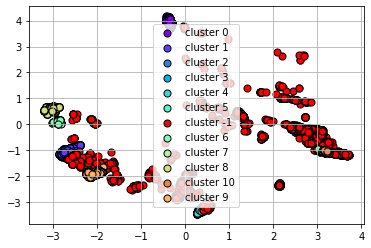

In [31]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)
# plt.rcParams["figure.figsize"] = (5.0,5.0) # https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

K_CLUSTERS = len(pca_X['cluster'].value_counts())

# colors = ['blue', 'lightblue', 'green', 'lightgreen', 'red', 'lightred', 'cyan', 'lightcyan', 'magenta', 'lightmagenta', 'yellow', 'lightyellow']
colors = mcm.rainbow(np.linspace(0, 1, K_CLUSTERS + 1))

# plot the clusters
for i in pca_X['cluster'].unique():   
    plt.scatter(
        pca_X_array[db_fitted.labels_ == i, 0], pca_X_array[db_fitted.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [32]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[db_fitted.labels_ == i, 0], 
                   pca_X_array[db_fitted.labels_ == i, 1], 
                   pca_X_array[db_fitted.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

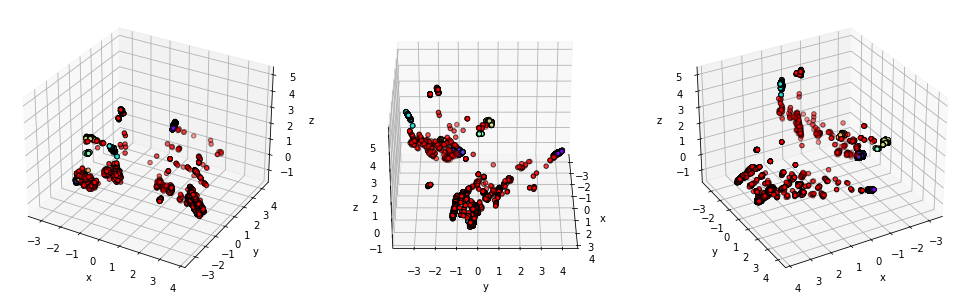

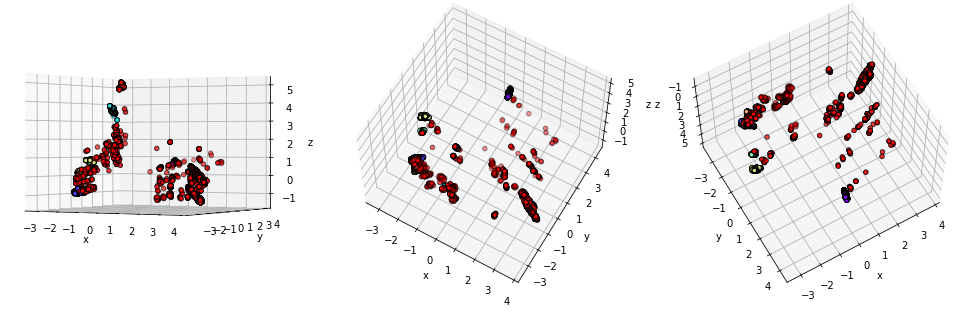

In [33]:
azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [34]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [35]:
# Cluster interpretation

# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

0        1        2        3        4        5        6        7  \
0     -0.42362  3.98779  0.66277  0.27197 -0.05620 -0.07843 -0.34805 -0.18190   
1     -2.71030 -1.03378 -0.93245 -0.09593 -0.01195 -0.06284 -0.14398 -0.08055   
2     -2.71381 -1.00548 -0.93477  0.06463  0.04078  0.07883 -0.42285 -0.39498   
3      2.48923 -0.13273 -0.76215 -1.48537  1.90633 -0.38093  0.21931 -0.76331   
4     -0.42564  4.00517  0.67221  0.27399 -0.05975 -0.08210 -0.35092 -0.18134   
...        ...      ...      ...      ...      ...      ...      ...      ...   
18597 -2.77320 -1.11939 -0.85920  0.01406  0.18981  0.54888 -0.51156  0.05593   
18598  3.35319 -1.11349  0.04275  1.52379 -0.16614 -0.84619  0.74815  0.29069   
18599  1.18722  0.46743 -0.98803 -0.87023  0.46082 -1.66923 -0.03004  2.12298   
18600  3.62122 -1.15414 -0.12932  1.56396 -0.55412  0.65044  0.00286  0.59596   
18601 -2.74192 -1.06942 -0.87123 -0.12434 -0.08876 -0.23614 -0.04068 -0.05633   

             8        9       10       11       12       13       14       15  \
0      0.08839 -0.06116  0.01330 -0.04612  0.02845 -0.03933 -0.05825  0.08944   
1      0.09781  0.05723 -0.24608  0.06657 -0.10980 -0.12151  0.04326  0.24844   
2      0.16876  0.00960  0.99210 -0.61246  0.34522 -0.20158  0.06433  0.03702   
3     -0.48713  0.30591 -0.47592  0.02601  0.02497 -0.07745  0.03638  0.15632   
4      0.08695 -0.05256  0.00703 -0.05066  0.03574 -0.02744 -0.05036  0.07528   
...        ...      ...      ...      ...      ...      ...      ...      ...   
18597  0.02902  0.35914 -0.30741  0.21878 -0.10985 -0.09786  0.00239  0.12890   
18598  0.52683 -0.14788 -0.13309 -0.38413 -0.29340 -0.12582  0.05864 -0.25667   
18599 -1.33212 -0.64669  1.09458  0.31631 -0.32989 -0.25140  0.97597 -0.13567   
18600  0.47533  0.35257 -0.70712  0.41012  1.24471 -0.54964  0.05042  0.29351   
18601  0.06240 -0.03197  0.08577 -0.20392  0.06649 -0.05338 -0.19156 -0.02511   

            16       17       18       19       20       21       22       23  \
0      0.05556 -0.04446  0.17630 -0.07698  0.00914  0.00116  0.05304  0.03714   
1      0.00457 -0.07627  0.03643 -0.06081 -0.18997  0.14163 -0.02675  0.25557   
2      0.07471  0.00414 -0.13977  0.11022 -0.03867  0.12846  0.22204  0.00026   
3      0.10933 -0.13175 -0.05974 -0.00099 -0.25896 -0.19474 -0.11791  0.15710   
4      0.05748 -0.03767  0.17539 -0.07293  0.00521  0.00639  0.05905  0.02888   
...        ...      ...      ...      ...      ...      ...      ...      ...   
18597  0.06502 -0.17109  0.09223  0.16836  0.06666 -0.23348  0.06771 -0.38526   
18598  0.65374 -0.00150  0.30105  0.02943  0.27494  0.01817 -0.38951  0.08457   
18599 -0.47919 -0.42834  0.34949 -0.43861  0.18549 -0.04253  0.01326  0.01672   
18600  0.05933  0.25292  0.31199 -0.00920 -0.51547  0.10165 -0.37001  0.13990   
18601 -0.09901 -0.07563 -0.05768 -0.13539  0.36385  0.06712  0.08307  0.03883   

            24       25       26       27       28       29       30       31  \
0      0.07793 -0.28128  0.03369 -0.36297  0.02532  0.21723  0.04275 -0.02068   
1      0.02911 -0.10808 -0.00663 -0.18099 -0.04048 -0.02466 -0.02175  0.01317   
2      0.21047 -0.03905  0.00432 -0.01283  0.15262 -0.01557  0.11928  0.09315   
3     -0.05924 -0.11335 -0.02137  0.01104 -0.05223 -0.05408 -0.05654 -0.04898   
4      0.09646 -0.26183  0.03572 -0.32279  0.01576  0.18168  0.04132  0.03405   
...        ...      ...      ...      ...      ...      ...      ...      ...   
18597 -0.09524  0.30600  0.08250 -0.15600 -0.16490  0.02393 -0.02423 -0.08855   
18598  0.14743  0.08270 -0.03072 -0.22899  0.71866 -0.35151 -0.47246 -0.07226   
18599  0.01404  0.08516 -0.00699  0.10401  0.00119  0.18715  0.10528  0.06142   
18600  0.39585  0.49166 -0.45086  0.44970 -0.01837  1.00912 -0.60706 -0.24300   
18601  0.19080  0.11335  0.06838 -0.06085 -0.08300  0.17469  0.16438 -0.02351   

            32       33       34       35       36       37       38       39  \
0     -0.06070 -0.06386 -0.11452  0.1651

In [36]:
# Cluster interpretation
# (using average for numerical, mode for categorical attributes)

#df.rename(columns = {'cluster':'Total'}, inplace = True)
result.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        'protocol': lambda x: x.value_counts().index[0],
        'service': lambda x: x.value_counts().index[0],
        'conn_state': lambda x: x.value_counts().index[0],
        'orig_p_cat' : lambda x: x.value_counts().index[0],
        'resp_p_cat': lambda x: x.value_counts().index[0],
        'connection.time': 'mean',
        'connection.duration': 'mean',
        'connection.orig_bytes': 'mean', 
        #'connection.orig_ip_bytes': 'mean',
        'connection.orig_pkts': 'mean',
        'connection.resp_bytes': 'mean',
        #'connection.resp_ip_bytes': 'mean',
        'connection.resp_pkts': 'mean',
        'dns_count': 'mean',
        'ssh_count': 'mean',
        'http_count': 'mean',
        'ssl_count': 'mean',
        'files_count': 'mean'
        
    }
).reset_index()

cluster_cat  cluster protocol service conn_state       orig_p_cat  \
0           -1     3044      tcp    none         SF  orig_reg_or_dyn   
1            0     3596      udp     dns         SF  orig_reg_or_dyn   
2            1     4964      udp     dns         SF  orig_reg_or_dyn   
3            2      869      tcp    http         SF  orig_reg_or_dyn   
4            3     1296      tcp     ssl         SF  orig_reg_or_dyn   
5            4      992      tcp     ssh         SF  orig_reg_or_dyn   
6            5     1803      tcp     ssl         SF  orig_reg_or_dyn   
7            6      420      udp     dns         SF  orig_reg_or_dyn   
8            7      294      tcp    http         SF  orig_reg_or_dyn   
9            8      383      udp     dns         SF  orig_reg_or_dyn   
10           9      675      udp     dns         SF  orig_reg_or_dyn   
11          10      266      tcp    none         SH  orig_reg_or_dyn   

   resp_p_cat  connection.time  connection.duration  connection.orig_bytes  \
0    resp_443          0.44752              0.01415                0.01240   
1     resp_53          0.49152              0.00010                0.00054   
2     resp_53          0.51242              0.00005                0.00086   
3     resp_80          0.57646              0.03005                0.00734   
4    resp_443          0.39939              0.01461                0.01373   
5     resp_22          0.33127              0.00715                0.01986   
6    resp_443          0.49898              0.03392                0.02000   
7     resp_53          0.04170              0.00006                0.00084   
8     resp_80          0.20034              0.00448                0.00700   
9     resp_53          0.53614              0.00000                0.00059   
10    resp_53          0.37409              0.00003                0.00075   
11   resp_443          0.39700              0.00009                0.00002   

    connection.orig_pkts  connection.resp_bytes  connection.resp_pkts  \
0                0.01025                0.00351               0.00775   
1                0.00069                0.00004               0.00049   
2                0.00147                0.00006               0.00098   
3                0.01033                0.00378               0.00762   
4                0.01572                0.01126               0.01579   
5                0.01477                0.00078               0.01568   
6                0.01766                0.00856               0.01437   
7                0.00140                0.00007               0.00098   
8                0.00537                0.00127               0.00336   
9                0.00135                0.00003               0.00096   
10               0.00135                0.00007               0.00096   
11               0.00077                0.00000               0.00000   

    dns_count  ssh_count  http_count  ssl_count  files_count  
0     0.13108    0.11235     0.10118    0.24212      0.01760  
1     1.00000    0.00000     0.00000    0.00000      0.00000  
2     1.00000    0.00000     0.00000    0.00000      0.00000  
3     0.00000    0.00000     0.73878    0.00000      0.06646  
4     0.00000    0.00000     0.00000    0.99151      0.06489  
5     0.00000    0.98891     0.00000    0.00000      0.00000  
6     0.00000    0.00000     0.00000    0.98669      0.04929  
7     1.00000    0.00000     0.00000    0.00000      0.00000  
8     0.00000    0.00000     1.00000    0.00000      0.03752  
9     1.00000    0.00000     0.00000    0.00000      0.00000  
10    1.00000    0.00000     0.00000    0.00000      0.00000  
11    0.00000    0.00000     0.00000    0.00000      0.00000

In [37]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [38]:
plt.rcParams["figure.figsize"] = (10,7)

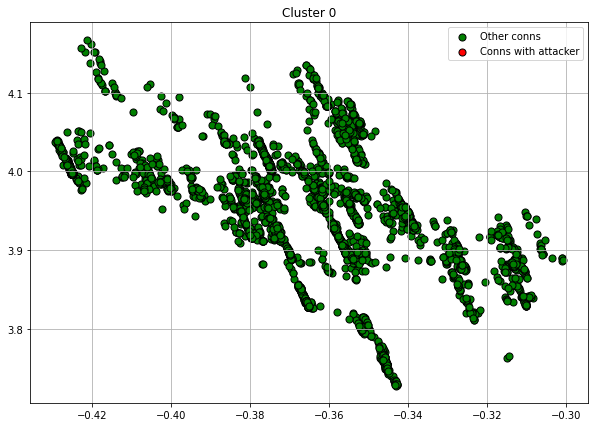

Total num of conns: 3596

Attacker conns ratio:
No    3596
Name: attacker_label, dtype: int64

IPs:
192.168.10.3    3596
Name: originated_ip, dtype: int64

192.168.10.1    3596
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-04T17:45:04.733364Z
timestamp max = 2017-07-04T18:14:59.69141Z

Cluster 0 OK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
15791  Cantcq1peNqTxcScUg            1.00000  192.168.10.3           0.85685   
1021   Ceq5891Mu4TpA0gHWb            1.00000  192.168.10.3           0.85685   
18011  CWf5yA3E7qErUbIrNj            1.00000  192.168.10.3           0.85685   
17042  CzzIrE4n40GGnd7fuk            1.00000  192.168.10.3           0.85685   
4486   CveK953xnOxAYfxIyd            1.00000  192.168.10.3           0.85685   
15560  C7TDQe4OgMfNLopzK4            1.00000  192.168.10.3           0.85685   
10361  CNMRf92mCzC6FqBp05            1.00000  192.168.10.3           0.85685   
17259  CIYK2w2frzCZ5FTSv1            1.00000  192.168.10.3           0.85685   
8304    CnST9vA3HrigLR1M5            1.00000  192.168.10.3           0.85685   
9797    CwPysu0qREWPrWiCd            1.00000  192.168.10.3           0.85685   
12685   CQIFKY3nnEoqEWZaI            1.00000  192.168.10.3           0.85685   
7449    Caqm0ByA6NiPgTlQl            1.00000  192.168.10.3           0.85685   
13738  CDBPjl4SejGt6TFET5            1.00000  192.168.10.3           0.85685   
15767  CI7uOm4qEBVSrukp9i            1.00000  192.168.10.3           0.85685   
17190   CZwUFaOMmCpNJFAS8            1.00000  192.168.10.3           0.85685   

       responded_ip                    timestamp  connection.time  duration  \
15791  192.168.10.1   2017-07-04T18:12:43.18072Z          0.92415   0.09244   
1021   192.168.10.1  2017-07-04T18:09:48.814533Z          0.82726   3.66422   
18011  192.168.10.1  2017-07-04T18:06:11.265589Z          0.70637   0.06913   
17042  192.168.10.1  2017-07-04T17:45:18.200915Z          0.01009   0.04083   
4486   192.168.10.1   2017-07-04T17:45:23.86029Z          0.01324   0.60727   
15560  192.168.10.1  2017-07-04T18:14:14.353789Z          0.97481   0.04820   
10361  192.168.10.1  2017-07-04T17:45:44.713254Z          0.02482   0.02339   
17259  192.168.10.1  2017-07-04T18:11:15.042421Z          0.87517   0.00040   
8304   192.168.10.1  2017-07-04T18:09:53.027068Z          0.82960   0.04798   
9797   192.168.10.1  2017-07-04T17:49:38.847956Z          0.15492   0.04788   
12685  192.168.10.1  2017-07-04T17:52:21.966086Z          0.24556   0.05918   
7449   192.168.10.1  2017-07-04T18:13:59.258488Z          0.96642   0.00054   
13738  192.168.10.1  2017-07-04T18:09:49.262167Z          0.82751   0.04861   
15767  192.168.10.1  2017-07-04T17:48:46.189677Z          0.12566   0.00044   
17190  192.168.10.1  2017-07-04T18:03:13.198909Z          0.60743   0.04847   

       connection.duration protocol service conn_state  connection.orig_p  \
15791              0.00005      udp     dns         SF            0.92472   
1021               0.00218      udp     dns         SF            0.94019   
18011              0.00004      udp     dns         SF            0.91697   
17042              0.00002      udp     dns         SF            0.93064   
4486               0.00036      udp     dns         SF            0.95152   
15560              0.00003      udp     dns         SF            0.94419   
10361              0.00001      udp     dns         SF            0.92605   
17259              0.00000      udp     dns         SF            0.94326   
8304               0.00003      udp     dns         SF            0.93500   
9797               0.00003      udp     dns         SF            0.91779   
12685              0.00004      udp     dns         SF            0.93751   
7449               0.00000      udp     dns         SF            0.93833   
13738              0.00003      udp     dns         SF            0.93502   
15767              0.00000      udp     dns         SF            0.93204   
17190              0.00003      udp     dns         SF            0.94331   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
15791   60597  orig_reg_or_dyn                0.00043       43   
1021    61611  orig_reg_or_dyn                0.00165      165   
18011   60089  orig_reg_or_dyn               

Protocol:
udp    3596
Name: protocol, dtype: int64

Service:
dns    3596
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    3596
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    3596
Name: resp_p_cat, dtype: int64




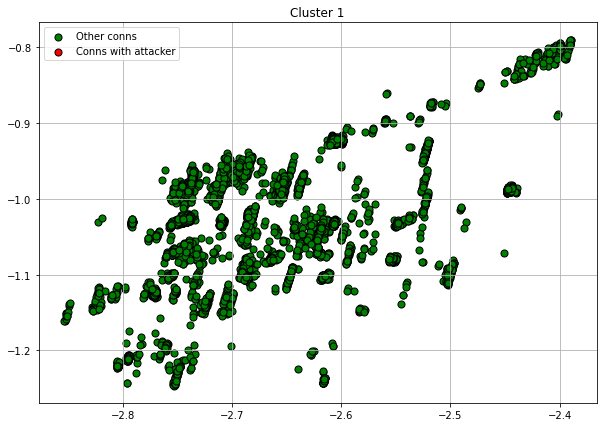

Total num of conns: 4964

Attacker conns ratio:
No    4964
Name: attacker_label, dtype: int64

IPs:
192.168.10.19    1108
192.168.10.9      790
192.168.10.14     693
192.168.10.12     645
192.168.10.5      622
192.168.10.8      424
192.168.10.15     345
192.168.10.17     179
192.168.10.16     158
Name: originated_ip, dtype: int64

192.168.10.3    4964
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-04T17:45:11.958597Z
timestamp max = 2017-07-04T18:14:59.623703Z

Cluster 1 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
16832  CGJHjS2hcXEyKEM7f1            1.00000  192.168.10.15           0.85685   
11827  CE2ZK72tYMWv1QawV3            1.00000   192.168.10.9           0.85685   
14660  Ckruon4b2J9SOYn46g            1.00000  192.168.10.14           0.85685   
3762   Ck5kV13Ayo3MGZFM6c            1.00000   192.168.10.8           0.85685   
2580   CUtrGi175OdljlB0c5            1.00000  192.168.10.19           0.85685   
1056   CoJR9h2EOeXiCBfbJ5            1.00000  192.168.10.15           0.85685   
15819   Cw3I1lk7u16t8gZdl            1.00000  192.168.10.19           0.85685   
10680   CEYIEF4M0oTXGSMOl            1.00000   192.168.10.8           0.85685   
6086   CxalzJ1ifsXDY6NFD1            1.00000  192.168.10.19           0.85685   
12479  CZuMzq4ZEp9JSUYr6i            1.00000  192.168.10.19           0.85685   
12676   CphxZ54TOUC6gnBvk            1.00000   192.168.10.8           0.85685   
13741  CfLGId1H6PBcSUTZM3            1.00000  192.168.10.19           0.85685   
597     C0o5Pe2k3NucsivPb            1.00000  192.168.10.19           0.85685   
7716   Cvlm7N1dwaAHJDFEhl            1.00000   192.168.10.9           0.85685   
6077    CENnc12iOoMnP5mxh            1.00000  192.168.10.19           0.85685   

       responded_ip                    timestamp  connection.time  duration  \
16832  192.168.10.3  2017-07-04T17:59:10.134546Z          0.47237   0.05018   
11827  192.168.10.3  2017-07-04T18:09:48.472427Z          0.82707   0.04705   
14660  192.168.10.3  2017-07-04T18:08:44.128981Z          0.79131   0.00017   
3762   192.168.10.3  2017-07-04T18:03:12.814211Z          0.60721   0.00021   
2580   192.168.10.3  2017-07-04T17:53:33.936798Z          0.28555   0.00023   
1056   192.168.10.3  2017-07-04T18:06:30.568477Z          0.71710   0.00021   
15819  192.168.10.3  2017-07-04T17:47:09.692885Z          0.07204   0.00022   
10680  192.168.10.3  2017-07-04T17:54:09.204541Z          0.30515   0.00018   
6086   192.168.10.3  2017-07-04T18:00:21.534415Z          0.51204   0.00031   
12479  192.168.10.3  2017-07-04T17:58:28.090575Z          0.44900   0.02411   
12676  192.168.10.3  2017-07-04T18:09:53.292732Z          0.82975   0.00089   
13741  192.168.10.3   2017-07-04T17:57:14.81613Z          0.40829   0.06045   
597    192.168.10.3  2017-07-04T17:57:18.303789Z          0.41023   0.02400   
7716   192.168.10.3  2017-07-04T18:09:49.367601Z          0.82756   0.00018   
6077   192.168.10.3  2017-07-04T17:59:23.392737Z          0.47973   0.00020   

       connection.duration protocol service conn_state  connection.orig_p  \
16832              0.00003      udp     dns         SF            0.88831   
11827              0.00003      udp     dns         SF            0.82398   
14660              0.00000      udp     dns         SF            0.98837   
3762               0.00000      udp     dns         SF            0.80947   
2580               0.00000      udp     dns         SF            0.67606   
1056               0.00000      udp     dns         SF            0.84126   
15819              0.00000      udp     dns         SF            0.47438   
10680              0.00000      udp     dns         SF            0.85598   
6086               0.00000      udp     dns         SF            0.73139   
12479              0.00001      udp     dns         SF            0.87370   
12676              0.00000      udp     dns         SF            0.76124   
13741              0.00004      udp     dns         SF            0.75551   
597                0.00001      udp     dns         SF            0.14321   
7716               0.00000      udp     dns         SF            0.87704   
6077               0.00000      udp     dns         SF            0.14948   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
16832   58211  orig_reg_or_dyn                0.00088       88   
11827   53996  orig_reg_or_dyn                0.00076       76   
14660   64768  orig_reg_or_dy

Protocol:
udp    4964
Name: protocol, dtype: int64

Service:
dns    4964
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    4964
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    4964
Name: resp_p_cat, dtype: int64




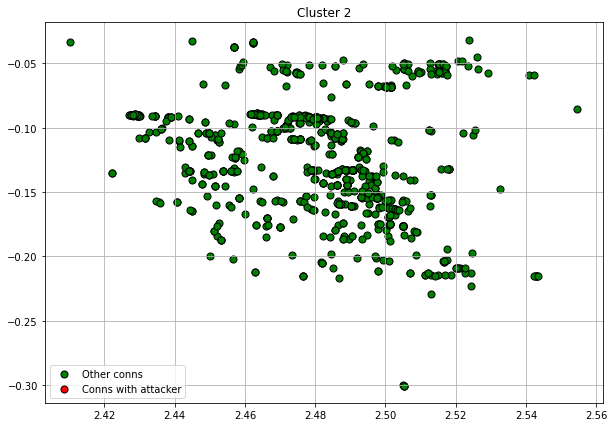

Total num of conns: 869

Attacker conns ratio:
No    869
Name: attacker_label, dtype: int64

IPs:
192.168.10.9     217
192.168.10.12    129
192.168.10.14    123
192.168.10.5     110
192.168.10.19    108
192.168.10.15     72
192.168.10.8      60
192.168.10.16     30
192.168.10.17     20
Name: originated_ip, dtype: int64

178.255.83.1      96
23.60.139.27      85
50.63.243.230     81
72.21.91.29       61
23.61.187.27      38
                  ..
169.55.70.227      1
52.84.145.117      1
104.88.90.50       1
54.235.110.123     1
54.235.145.152     1
Name: responded_ip, Length: 140, dtype: int64

Time:
timestamp min = 2017-07-04T17:45:15.799561Z
timestamp max = 2017-07-04T18:14:59.409784Z

Cluster 2 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
12807  CxqI7X24wzsvDumW2a            1.00000   192.168.10.8           0.08576   
9543   CppV1y31DgJf9A8sNc            1.00000   192.168.10.5           0.21537   
12276  CksvaT3pTA007RNInh            1.00000  192.168.10.12           0.08312   
10237  CmkZmW3FKsySCPUINb            1.00000  192.168.10.15           0.08312   
17277  CEZGmO1D2ZEYMdhsA9            1.00000   192.168.10.5           0.08215   
11219  CuXxd12udssfbJGPkh            1.00000  192.168.10.15           0.76639   
6019    CyqXvJjFdTsRoRUdh            1.00000   192.168.10.9           0.45225   
5126    CizzWQ6UrpADgKsV6            1.00000  192.168.10.15           0.45354   
16989  CXNjqz23JtiA9pxQM3            1.00000  192.168.10.12           0.08312   
8501   CVrl3H1m0LkGAEWuyl            1.00000   192.168.10.5           0.79447   
7163    CT1bj87rzyPwuEssk            1.00000   192.168.10.5           0.08314   
6095   CRAbIc476dhNhm61Sd            1.00000   192.168.10.9           0.20649   
16785  CHR0AV27pf3WTaHDnd            1.00000   192.168.10.9           0.22486   
8119    C7QECL11Ea7rY2Smz            1.00000  192.168.10.15           0.08312   
4012   CUiCjj22oJ83sxbBFe            1.00000   192.168.10.9           0.77140   

          responded_ip                    timestamp  connection.time  \
12807    23.208.165.24  2017-07-04T18:09:52.157915Z          0.82911   
9543      52.49.163.13  2017-07-04T18:12:15.107486Z          0.90855   
12276     23.60.139.27   2017-07-04T17:51:19.59334Z          0.21090   
10237     23.60.139.27  2017-07-04T17:52:21.395455Z          0.24524   
17277     23.6.101.231  2017-07-04T18:12:15.426956Z          0.90872   
11219    172.217.10.46  2017-07-04T18:05:50.953785Z          0.69509   
6019     104.16.24.216  2017-07-04T18:09:54.262942Z          0.83028   
5126      104.88.90.50  2017-07-04T18:03:05.834306Z          0.60334   
16989     23.60.139.27  2017-07-04T17:51:19.634787Z          0.21093   
8501      178.255.83.1  2017-07-04T17:59:30.790496Z          0.48384   
7163      23.61.187.27  2017-07-04T18:12:17.215687Z          0.90972   
6095     50.63.243.230   2017-07-04T17:49:06.32162Z          0.13685   
16785    54.69.173.138  2017-07-04T18:09:51.636183Z          0.82882   
8119      23.60.139.27  2017-07-04T18:05:52.380386Z          0.69588   
4012   173.241.242.143  2017-07-04T18:09:49.438301Z          0.82760   

       duration  connection.duration protocol service conn_state  \
12807   5.84254              0.00348      tcp    none         SF   
9543    5.33112              0.00317      tcp    none         SF   
12276  84.82672              0.05046      tcp    http         SF   
10237   5.31156              0.00316      tcp    none         SF   
17277   5.98749              0.00356      tcp    none         SF   
11219 118.01982              0.07021      tcp    http         SF   
6019   46.03987              0.02739      tcp    http         SF   
5126   60.07207              0.03573      tcp    http         SF   
16989   5.35627              0.00319      tcp    none         SF   
8501    0.04773              0.00003      tcp    http         SF   
7163    5.16146              0.00307      tcp    none         SF   
6095    0.06945              0.00004      tcp    http         SF   
16785  60.75281              0.03614      tcp    http         SF   
8119   90.45157              0.05381      tcp    http         SF   
4012    5.50734              0.00328      tcp    none         SF   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
12807            0.85168   55811  orig_reg_or_dyn                0.00000   
9543             0.89638   58740  orig_reg_or_dyn                0.00000   
12276            0.77908   51054  orig_reg_or_dyn                0.00434   
10237            0.86619   56762  orig_reg_or_dyn                0.00000   
17277            0.89653   58750  orig_reg_or_dyn                0.00000   
11219            0.86758   

Protocol:
tcp    869
Name: protocol, dtype: int64

Service:
http    639
none    230
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    869
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80     868
resp_443      1
Name: resp_p_cat, dtype: int64




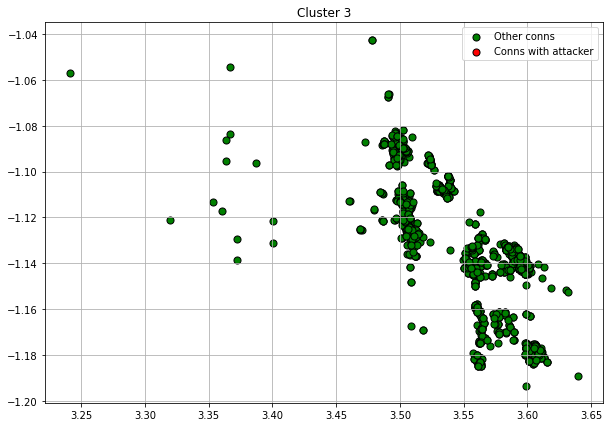

Total num of conns: 1296

Attacker conns ratio:
No    1296
Name: attacker_label, dtype: int64

IPs:
192.168.10.25    923
192.168.10.51    373
Name: originated_ip, dtype: int64

52.84.145.136     93
52.84.145.207     66
162.213.33.50     60
52.84.145.135     49
52.84.145.252     48
                  ..
52.22.205.9        1
54.225.135.218     1
52.84.143.196      1
52.2.180.200       1
23.194.141.104     1
Name: responded_ip, Length: 249, dtype: int64

Time:
timestamp min = 2017-07-04T17:45:04.558148Z
timestamp max = 2017-07-04T18:14:58.479854Z

Cluster 3 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
12607   C1IvUGpfBtVPogaX2            1.00000  192.168.10.51           0.08575   
10095  CMp8Iz4N5OUz8dOTl1            1.00000  192.168.10.25           0.21599   
14783  Cx2uVK318YPH1qj26b            1.00000  192.168.10.51           0.28876   
17063  CXGmqs1LR3TwTXnGi7            1.00000  192.168.10.25           0.85609   
18226   C1d4x7TrFXZyeiovk            1.00000  192.168.10.51           0.08575   
1485   CgcSq142Ml2EKZD8Rd            1.00000  192.168.10.25           0.91142   
14202  CmMNIb11s6zzClj8v7            1.00000  192.168.10.25           0.66841   
4413   Cth7Ic3KEEGxF04D0a            1.00000  192.168.10.25           0.21599   
8517   CYDSui4OV1OkLZuKQ7            1.00000  192.168.10.25           0.76639   
1310   CBzK4L2nInVCLENti5            1.00000  192.168.10.51           0.30592   
12948  Ccdcvo49KgKtsirG0c            1.00000  192.168.10.51           0.11881   
3833   C5LKL52zECaJwF2y41            1.00000  192.168.10.25           0.76639   
15790  CDlFLD4KED87WWtXme            1.00000  192.168.10.25           0.88754   
4092   CilgZk48JBdt4og8p5            1.00000  192.168.10.25           0.76639   
8241   CPcVmz3TtL7TPo0va6            1.00000  192.168.10.25           0.21599   

         responded_ip                    timestamp  connection.time  duration  \
12607  23.208.101.123  2017-07-04T18:01:13.841442Z          0.54111 117.18684   
10095   52.84.145.136  2017-07-04T18:09:44.816667Z          0.82504   0.42485   
14783   68.67.178.246  2017-07-04T18:00:19.154733Z          0.51072   5.37277   
17063   192.124.249.5  2017-07-04T17:58:57.432918Z          0.46531  17.86381   
18226  23.208.101.123   2017-07-04T18:00:12.62175Z          0.50709   5.33103   
1485   204.154.110.79  2017-07-04T17:49:52.909649Z          0.16274   0.17464   
14202    151.101.1.69  2017-07-04T17:52:17.540485Z          0.24310   0.08337   
4413    52.84.145.135  2017-07-04T18:08:31.698824Z          0.78441   0.31334   
8517    172.217.11.46  2017-07-04T17:51:08.612114Z          0.20480   0.34576   
1310      72.5.205.56  2017-07-04T18:00:19.152304Z          0.51072   1.10444   
12948     31.13.80.36  2017-07-04T17:53:37.281601Z          0.28741 181.76240   
3833   172.217.12.129  2017-07-04T17:51:13.627344Z          0.20759   0.18790   
15790     199.96.57.6  2017-07-04T17:58:57.979989Z          0.46561  17.28852   
4092    172.217.10.42  2017-07-04T17:58:57.489226Z          0.46534  17.81622   
8241    52.84.145.136  2017-07-04T18:10:26.786304Z          0.84836   0.28817   

       connection.duration protocol service conn_state  connection.orig_p  \
12607              0.06971      tcp     ssl         SF            0.82941   
10095              0.00025      tcp     ssl         SF            0.94068   
14783              0.00320      tcp     ssl         SF            0.89807   
17063              0.01063      tcp     ssl         SF            0.93684   
18226              0.00317      tcp     ssl         SF            0.82766   
1485               0.00010      tcp     ssl         SF            0.92817   
14202              0.00005      tcp     ssl         SF            0.93363   
4413               0.00019      tcp     ssl         SF            0.94036   
8517               0.00021      tcp     ssl         SF            0.93107   
1310               0.00066      tcp     ssl         SF            0.71749   
12948              0.10812      tcp     ssl         SF            0.54027   
3833               0.00011      tcp     ssl         SF            0.93157   
15790              0.01028      tcp     ssl         SF            0.93697   
4092               0.01060      tcp     ssl         SF            0.93691   
8241               0.00017      tcp     ssl         SF            0.94086   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
12607   54352  orig_reg_or_dyn                0.01649     1647   
10095   61643  orig_reg_or_dyn                0.00872      871 

Protocol:
tcp    1296
Name: protocol, dtype: int64

Service:
ssl     1285
none      11
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    1296
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           1294
resp_well_known       2
Name: resp_p_cat, dtype: int64




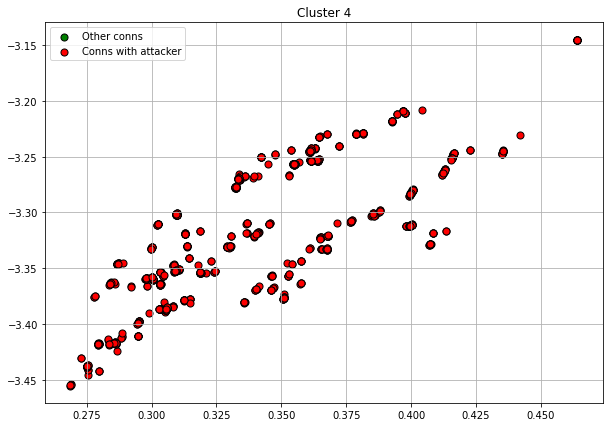

Total num of conns: 992

Attacker conns ratio:
Yes    992
Name: attacker_label, dtype: int64

IPs:
172.16.0.1    992
Name: originated_ip, dtype: int64

192.168.10.50    992
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-04T17:45:00.121663Z
timestamp max = 2017-07-04T18:05:05.302809Z

Cluster 4 NOK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
11531  CCk3Sa4n5UP5ky52Fc            0.84000    172.16.0.1           0.85685   
11313   CUBfY6MEFcrtAmlhf            0.84000    172.16.0.1           0.85685   
2769   CR6dsB3xP140a4PfBe            0.84000    172.16.0.1           0.85685   
1296    C1vILVZN8OhxBQ4k1            0.84000    172.16.0.1           0.85685   
128    CmanWB29pPnuJbF438            0.84000    172.16.0.1           0.85685   
3248    CHLTPa2tTy036SMWc            0.84000    172.16.0.1           0.85685   
6912   C0fPB73OODpYixAdWf            0.84000    172.16.0.1           0.85685   
14502  CkcyA71OHqjh77A9A7            0.84000    172.16.0.1           0.85685   
18190    CEMsehBnK59le6L8            0.84000    172.16.0.1           0.85685   
7835   CLuqNp4UXD2Y6RRk1e            0.84000    172.16.0.1           0.85685   
2758    CKuI6pKYwnNpmWlVk            0.84000    172.16.0.1           0.85685   
14491  CdQgZp3Yrdyl5ifaJ3            0.84000    172.16.0.1           0.85685   
12426  CQOwo02AxWoPh1e9B5            0.84000    172.16.0.1           0.85685   
10523  CHhf5Y3EoUEFNuWjal            0.84000    172.16.0.1           0.85685   
12888  CJOXg22SDtbuadQACh            0.84000    172.16.0.1           0.85685   

        responded_ip                    timestamp  connection.time  duration  \
11531  192.168.10.50  2017-07-04T18:03:53.626864Z          0.62989  10.18550   
11313  192.168.10.50  2017-07-04T17:49:08.182378Z          0.13788  12.41489   
2769   192.168.10.50  2017-07-04T17:49:38.387222Z          0.15467  12.27520   
1296   192.168.10.50  2017-07-04T18:01:23.853803Z          0.54667  13.65114   
128    192.168.10.50  2017-07-04T18:04:26.795597Z          0.64832  11.65840   
3248   192.168.10.50  2017-07-04T18:04:52.661413Z          0.66270  12.51054   
6912   192.168.10.50  2017-07-04T17:57:42.778823Z          0.42383  12.87374   
14502  192.168.10.50  2017-07-04T17:58:51.223328Z          0.46186  11.09436   
18190  192.168.10.50  2017-07-04T17:47:44.499888Z          0.09138  13.29142   
7835   192.168.10.50  2017-07-04T18:03:52.201242Z          0.62910  11.53161   
2758   192.168.10.50  2017-07-04T17:45:04.561149Z          0.00251  10.91768   
14491  192.168.10.50  2017-07-04T17:52:05.946803Z          0.23666  11.42571   
12426  192.168.10.50  2017-07-04T17:59:12.936382Z          0.47392  12.24054   
10523  192.168.10.50  2017-07-04T17:50:30.021275Z          0.18336  11.99147   
12888  192.168.10.50  2017-07-04T17:53:52.135897Z          0.29567  11.63698   

       connection.duration protocol service conn_state  connection.orig_p  \
11531              0.00606      tcp     ssh         SF            0.78870   
11313              0.00739      tcp     ssh         SF            0.76593   
2769               0.00730      tcp     ssh         SF            0.76663   
1296               0.00812      tcp     ssh         SF            0.78433   
128                0.00694      tcp     ssh         SF            0.78946   
3248               0.00744      tcp     ssh         SF            0.79032   
6912               0.00766      tcp     ssh         SF            0.77893   
14502              0.00660      tcp     ssh         SF            0.78064   
18190              0.00791      tcp     ssh         SF            0.76404   
7835               0.00686      tcp     ssh         SF            0.78851   
2758               0.00649      tcp     ssh         SF            0.75992   
14491              0.00680      tcp     ssh         SF            0.77057   
12426              0.00728      tcp     ssh         SF            0.78116   
10523              0.00713      tcp     ssh         SF            0.76803   
12888              0.00692      tcp     ssh         SF            0.77338   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
11531   51684  orig_reg_or_dyn                0.02010     2008   
11313   50192  orig_reg_or_dyn                0.02010     2008   
2769    50238  orig_reg_or_dy

Protocol:
tcp    992
Name: protocol, dtype: int64

Service:
ssh     980
none     12
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    992
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_22    992
Name: resp_p_cat, dtype: int64




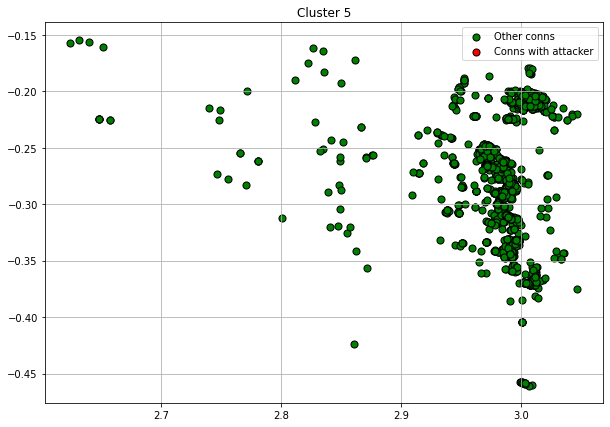

Total num of conns: 1803

Attacker conns ratio:
No    1803
Name: attacker_label, dtype: int64

IPs:
192.168.10.19    579
192.168.10.12    267
192.168.10.9     228
192.168.10.5     218
192.168.10.15    180
192.168.10.8     130
192.168.10.14     96
192.168.10.16     82
192.168.10.17     23
Name: originated_ip, dtype: int64

172.217.12.194    31
172.217.11.34     25
172.217.7.1       25
64.147.131.201    24
64.147.131.160    20
                  ..
184.73.198.237     1
23.208.217.99      1
54.210.85.226      1
52.24.139.120      1
178.250.0.78       1
Name: responded_ip, Length: 628, dtype: int64

Time:
timestamp min = 2017-07-04T17:45:15.34458Z
timestamp max = 2017-07-04T18:14:56.396687Z

Cluster 5 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
12334   Cn6zv4YqncuMtAnva            1.00000  192.168.10.15           0.30592   
14265  CyHQK443eLiN5tY3Ca            1.00000   192.168.10.5           0.21535   
9824    CcJuNH2ne4UPoe3yz            1.00000  192.168.10.19           0.30621   
10461   CizvqdrSkKnIImUgk            1.00000  192.168.10.19           0.76639   
16352  CannY11l02yJU1qH9k            1.00000  192.168.10.19           0.45370   
8164   C6WzEe2jDuMpy1I9Eh            1.00000  192.168.10.15           0.21547   
7558    CnEftKd81zu2l5Opb            1.00000   192.168.10.9           0.66841   
8954   CMj4pe3uAJyukfrF9g            1.00000   192.168.10.8           0.21449   
2448   CEuNk74NVS1ZJAEyl4            1.00000  192.168.10.19           0.76639   
14891   CK7Z38Ifh7FQdC5Y7            1.00000   192.168.10.5           0.76639   
17396  CcCat24nWwjeaLEHZ7            1.00000  192.168.10.12           0.46606   
10425  CS7Xlz2TuHQRU7vtJ7            1.00000  192.168.10.15           0.27191   
2479   Chovz62k25m2APcs1j            1.00000  192.168.10.19           0.76639   
5142   CxlaI63Oizz6Ud6PMf            1.00000  192.168.10.19           0.21465   
10691  CxL82r4Tm7ZORCzPvi            1.00000   192.168.10.8           0.66841   

         responded_ip                    timestamp  connection.time  duration  \
12334     72.5.205.34  2017-07-04T18:05:53.534616Z          0.69652   5.53750   
14265    52.48.195.24    2017-07-04T18:12:17.3196Z          0.90978  65.26744   
9824    72.21.215.147  2017-07-04T17:57:15.822301Z          0.40885 115.52475   
10461     172.217.7.1  2017-07-04T18:00:20.082256Z          0.51123   6.02995   
16352   104.97.139.37    2017-07-04T17:57:20.7729Z          0.41160 293.60001   
8164    52.55.152.195   2017-07-04T18:05:52.26283Z          0.69581  65.28102   
7558    151.101.0.175  2017-07-04T17:49:03.679176Z          0.13538   5.68419   
8954     52.0.184.249   2017-07-04T18:03:12.06845Z          0.60680  61.11753   
2448   172.217.12.194  2017-07-04T17:58:21.757075Z          0.44548   5.62635   
14891  172.217.10.227   2017-07-04T18:04:55.63809Z          0.66435   1.55718   
17396  107.21.250.221  2017-07-04T18:05:55.974876Z          0.69788   0.29924   
10425  64.147.131.201  2017-07-04T18:06:32.429053Z          0.71813   1.35107   
2479    172.217.6.193  2017-07-04T17:47:09.606828Z          0.07199 115.42023   
5142     52.9.151.139  2017-07-04T17:58:54.958221Z          0.46393  61.75090   
10691    151.101.1.49  2017-07-04T18:09:51.333051Z          0.82866 115.68040   

       connection.duration protocol service conn_state  connection.orig_p  \
12334              0.00329      tcp     ssl         SF            0.86834   
14265              0.03882      tcp     ssl         SF            0.89703   
9824               0.06872      tcp     ssl         SF            0.68691   
10461              0.00359      tcp     ssl         SF            0.70595   
16352              0.17465      tcp     ssl         SF            0.56372   
8164               0.03883      tcp     ssl         SF            0.86789   
7558               0.00338      tcp     ssl         SF            0.11372   
8954               0.03636      tcp     ssl         SF            0.85055   
2448               0.00335      tcp     ssl         SF            0.50155   
14891              0.00093      tcp     ssl         SF            0.89565   
17396              0.00018      tcp     ssl         SF            0.72369   
10425              0.00080      tcp     ssl         SF            0.86886   
2479               0.06866      tcp     ssl         SF            0.62188   
5142               0.03673      tcp     ssl         SF            0.70577   
10691              0.06881      tcp     ssl         SF            0.85136   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
12334   56903  orig_reg_or_dyn                0.00600      599   
14265   58783  orig_reg_or_dyn                0.05680     5674 

Protocol:
tcp    1803
Name: protocol, dtype: int64

Service:
ssl     1779
none      24
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    1803
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           1769
resp_well_known      24
resp_80              10
Name: resp_p_cat, dtype: int64




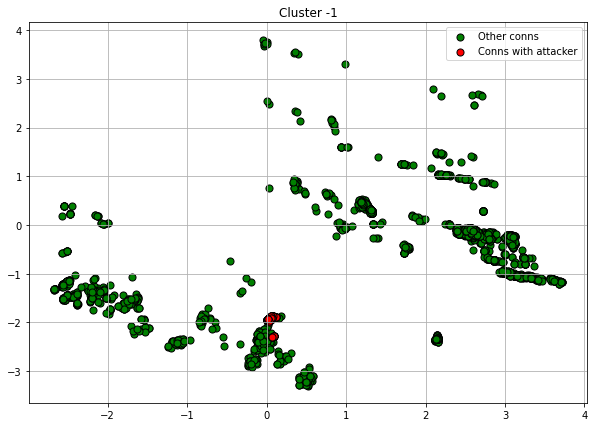

Total num of conns: 3044

Attacker conns ratio:
No     2662
Yes     382
Name: attacker_label, dtype: int64

IPs:
192.168.10.17     541
192.168.10.25     340
192.168.10.14     278
192.168.10.16     276
172.16.0.1        268
192.168.10.8      264
192.168.10.12     245
192.168.10.51     241
192.168.10.19     154
192.168.10.5      141
192.168.10.9      139
192.168.10.15      82
192.168.10.50      53
192.168.10.3       19
63.241.108.104      1
123.130.127.12      1
185.49.84.72        1
Name: originated_ip, dtype: int64

192.168.10.50     497
192.168.10.3      445
172.16.0.1        114
192.168.10.255     72
23.50.75.27        51
                 ... 
31.13.80.36         1
172.217.10.78       1
23.203.49.224       1
91.189.95.83        1
198.22.162.9        1
Name: responded_ip, Length: 588, dtype: int64

Time:
timestamp min = 2017-07-04T17:45:00.041825Z
timestamp max = 2017-07-04T18:14:59.550182Z

Cluster -1 NOK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
3941   CYTLKX35kx3pR4KBpl            0.84000    172.16.0.1           0.85685   
10259  CBhIMx2ehtP89O4Tcb            0.84000    172.16.0.1           0.85685   
1079   CJVt8x4wfbKmIkipRg            0.84000    172.16.0.1           0.85685   
14458  CoOBL23FxUCwXSULs1            0.84000    172.16.0.1           0.85685   
2914   CHxZPs4o0h8h664llb            0.84000    172.16.0.1           0.85685   
14626  Cghtql3S3MuK9cPZHd            0.84000    172.16.0.1           0.85685   
18216  CuJ1us3L7CWWF2uHUl            0.84000    172.16.0.1           0.85685   
12574  CfItIk4uJOKGVMNvOl            0.84000    172.16.0.1           0.85685   
14127  CDWeY03HzDckRjDkdd            0.84000    172.16.0.1           0.85685   
8195   CKS1tb448LORXMhbE8            0.84000    172.16.0.1           0.85685   
4911   CKFWto1crJTDw9OjG2            0.84000    172.16.0.1           0.85685   
9245   CqOZBg4QEA7wPvGmg1            0.84000    172.16.0.1           0.85685   
3069   Cc1J7D2YjdS2KngJyi            0.84000    172.16.0.1           0.85685   
3026   CErTF43Y4P3ADNSddb            0.84000    172.16.0.1           0.85685   
17691  COPENW3brsRXPpivHj            0.84000    172.16.0.1           0.85685   

        responded_ip                    timestamp  connection.time  duration  \
3941   192.168.10.50  2017-07-04T18:05:14.037126Z          0.67457  12.22565   
10259  192.168.10.50  2017-07-04T18:10:19.392297Z          0.84425  12.33949   
1079   192.168.10.50  2017-07-04T18:08:40.919223Z          0.78953   0.00165   
14458  192.168.10.50  2017-07-04T18:05:26.460252Z          0.68148  12.04442   
2914   192.168.10.50  2017-07-04T18:05:38.834264Z          0.68835  11.72177   
14626  192.168.10.50  2017-07-04T18:10:32.343653Z          0.85144  12.39689   
18216  192.168.10.50    2017-07-04T18:09:04.2021Z          0.80247  11.96622   
12574  192.168.10.50   2017-07-04T18:09:53.95554Z          0.83011  12.08288   
14127  192.168.10.50  2017-07-04T18:05:15.173309Z          0.67520  11.49382   
8195   192.168.10.50  2017-07-04T18:10:04.000263Z          0.83570  11.50857   
4911   192.168.10.50  2017-07-04T18:08:26.792674Z          0.78168  13.45216   
9245   192.168.10.50  2017-07-04T18:05:38.590457Z          0.68822  12.70076   
3069   192.168.10.50  2017-07-04T18:11:15.573025Z          0.87547  10.51261   
3026   192.168.10.50  2017-07-04T18:08:25.165366Z          0.78078  13.62655   
17691  192.168.10.50  2017-07-04T18:06:51.895033Z          0.72895  13.31400   

       connection.duration protocol service conn_state  connection.orig_p  \
3941               0.00727      tcp     ssh         SF            0.79068   
10259              0.00734      tcp     ssh         SF            0.79776   
1079               0.00000      tcp    none         SF            0.79526   
14458              0.00716      tcp     ssh         SF            0.79108   
2914               0.00697      tcp     ssh         SF            0.79144   
14626              0.00737      tcp     ssh         SF            0.79813   
18216              0.00712      tcp     ssh         SF            0.79584   
12574              0.00719      tcp     ssh         SF            0.79706   
14127              0.00684      tcp     ssh         SF            0.79083   
8195               0.00685      tcp     ssh         SF            0.79730   
4911               0.00800      tcp     ssh         SF            0.79483   
9245               0.00756      tcp     ssh         SF            0.79138   
3069               0.00625      tcp     ssh         SF            0.79914   
3026               0.00811      tcp     ssh         SF            0.79444   
17691              0.00792      tcp     ssh         SF            0.79383   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
3941    51814  orig_reg_or_dyn                0.01994     1992   
10259   52278  orig_reg_or_dyn                0.02010     2008   
1079    52114  orig_reg_or_dy

Cluster -1 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
8162   Cqtxj329GPZRbMdTZi            1.00000   192.168.10.8           0.26902   
10327  CLVGK31QsTwVmJqLki            1.00000   192.168.10.8           0.31023   
7374   CSGhY92QraekUDOu73            1.00000  192.168.10.16           0.85685   
6587   C8kxBx4mLa5KDcF5pf            1.00000  192.168.10.19           0.76639   
13410  CqbqVy4VqGxcp9zQL1            1.00000  192.168.10.25           0.90886   
227    CqkFrw1B04lP8Z6c91            1.00000   192.168.10.9           0.88881   
11965    CzA5podJc7nGjXTL            1.00000  192.168.10.12           0.45228   
14681   Cw13MEnOjulO229cd            1.00000  192.168.10.25           0.45370   
12986   CEkzycCqAS350c0La            1.00000  192.168.10.51           0.76280   
5931   CF0wv142Tq7EXs3Jwe            1.00000  192.168.10.16           0.30620   
915    CEJnD42mkdAedhWZUk            1.00000  192.168.10.17           0.96737   
17792  C8ZMBv1elT5Zrr7ckc            1.00000  192.168.10.25           0.45370   
3565   CjJm6H10rsPPbPRIu4            1.00000  192.168.10.17           0.85685   
10884  C13Z1d3P7a1vjQzYUe            1.00000  192.168.10.51           0.96451   
17974  CQu2NE2h2bAwvyyI3d            1.00000  192.168.10.17           0.85577   

          responded_ip                    timestamp  connection.time  \
8162    63.241.108.104   2017-07-04T17:45:47.66955Z          0.02646   
10327     72.247.71.12  2017-07-04T18:09:52.812396Z          0.82948   
7374      192.168.10.3  2017-07-04T17:46:46.028108Z          0.05889   
6587    172.217.12.194  2017-07-04T18:14:06.704667Z          0.97056   
13410    204.11.109.67  2017-07-04T17:49:47.890845Z          0.15995   
227      199.167.65.22  2017-07-04T17:45:41.274428Z          0.02291   
11965   104.17.145.111  2017-07-04T18:14:54.905635Z          0.99734   
14681     104.97.91.19  2017-07-04T17:53:35.646585Z          0.28650   
12986       172.16.0.1  2017-07-04T18:11:15.014283Z          0.87516   
5931       72.21.81.48  2017-07-04T17:45:24.054981Z          0.01334   
915    216.218.254.202  2017-07-04T17:54:37.550725Z          0.32090   
17792     104.97.91.19  2017-07-04T18:00:19.334863Z          0.51082   
3565      192.168.10.3  2017-07-04T17:54:09.620348Z          0.30538   
10884   216.58.212.131  2017-07-04T17:45:01.070916Z          0.00057   
17974    192.107.16.44  2017-07-04T17:49:40.434533Z          0.15580   

       duration  connection.duration protocol service conn_state  \
8162    2.99915              0.00178      udp     dns         S0   
10327   5.18802              0.00309      tcp     ssl         SF   
7374    0.00015              0.00000      udp     dns         SF   
6587   51.04510              0.03036      tcp     ssl         S1   
13410   1.04266              0.00062      tcp     ssl         SF   
227    63.12405              0.03755      tcp    none         SF   
11965   3.29373              0.00196      tcp     ssl         S1   
14681   0.02312              0.00001      tcp    none         SF   
12986   3.33313              0.00198      tcp     ssl         SF   
5931   81.88968              0.04871      tcp    none         SF   
915     0.08108              0.00005      udp     ntp         SF   
17792   0.02361              0.00001      tcp    none         SF   
3565    0.06069              0.00004      udp     dns         SF   
10884 206.58609              0.12289      tcp    none         SF   
17974   3.37536              0.00201      tcp     ssl         SF   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
8162             0.00204     137  orig_well_known                0.00150   
10327            0.85191   55826  orig_reg_or_dyn                0.00352   
7374             0.75915   49748  orig_reg_or_dyn                0.00102   
6587             0.50651   33193  orig_reg_or_dyn                0.00969   
13410            0.92736   60770  orig_reg_or_dyn                0.01124   
227              0.11087   

Protocol:
tcp     2193
udp      848
icmp       3
Name: protocol, dtype: int64

Service:
none                  758
ssl                   737
dns                   409
ntp                   372
http                  306
ssh                   302
ftp-data               41
ftp                    41
krb                    32
smb,gssapi,dce_rpc     15
krb_tcp                11
dce_rpc                 9
smb,krb,gssapi          8
smb,ntlm,gssapi         2
smb                     1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    2543
orig_well_known     501
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           1095
resp_80             543
resp_123            372
resp_22             343
resp_well_known     304
resp_53             261
resp_reg             68
resp_21              41
resp_dyn             17
Name: resp_p_cat, dtype: int64




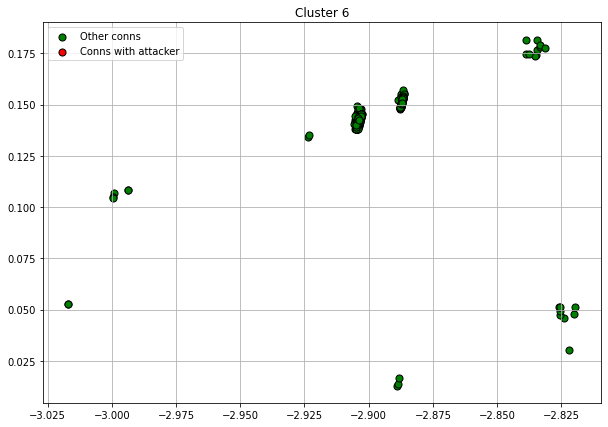

Total num of conns: 420

Attacker conns ratio:
No    420
Name: attacker_label, dtype: int64

IPs:
192.168.10.8     409
192.168.10.14     11
Name: originated_ip, dtype: int64

192.168.10.3    420
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-04T17:45:04.73306Z
timestamp max = 2017-07-04T18:04:52.103775Z

Cluster 6 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
12850  Cz7BE23I7ylQ8bBgi4            1.00000   192.168.10.8           0.85685   
1403    CXKvQ8269VfDY1fPf            1.00000   192.168.10.8           0.85685   
14973  CS4IfI2G6GJIswFIId            1.00000   192.168.10.8           0.85685   
14005   Csom3E1zMuNjkd74t            1.00000   192.168.10.8           0.85685   
558    CguUeo3BN43Et8kU33            1.00000   192.168.10.8           0.85685   
11608  CH0n9b1t2YaDA9bBY2            1.00000   192.168.10.8           0.85685   
999     Cwp0ry3r9FHqZ7XCM            1.00000   192.168.10.8           0.85685   
10213  CebPIP3W4DPkPz3zNk            1.00000  192.168.10.14           0.85685   
99      CQVB5MAEpFzm4PCFg            1.00000   192.168.10.8           0.85685   
1738   CgnqzU36HcpwLViPhe            1.00000   192.168.10.8           0.85685   
16532  CkdqBD2jxmoyMhDjoi            1.00000   192.168.10.8           0.85685   
17608  Cz4rwH1FTpVLaPHGP4            1.00000   192.168.10.8           0.85685   
13837   Cp80YqOk2s6r1gtt2            1.00000   192.168.10.8           0.85685   
16017   Cj35vEcmKr2pAIzkk            1.00000   192.168.10.8           0.85685   
12530  C0LMdv2bPZxtyYXv8k            1.00000   192.168.10.8           0.85685   

       responded_ip                    timestamp  connection.time  duration  \
12850  192.168.10.3  2017-07-04T17:45:44.767068Z          0.02485   0.00016   
1403   192.168.10.3  2017-07-04T17:45:48.701744Z          0.02704   0.03102   
14973  192.168.10.3  2017-07-04T17:45:48.653666Z          0.02701   0.03094   
14005  192.168.10.3  2017-07-04T17:45:44.273475Z          0.02458   0.00015   
558    192.168.10.3  2017-07-04T17:45:43.621968Z          0.02422   0.06011   
11608  192.168.10.3   2017-07-04T17:45:43.59929Z          0.02420   0.06157   
999    192.168.10.3  2017-07-04T17:45:43.143916Z          0.02395   0.06156   
10213  192.168.10.3  2017-07-04T18:04:12.970718Z          0.64064   0.25057   
99     192.168.10.3  2017-07-04T17:45:44.261087Z          0.02457   6.58030   
1738   192.168.10.3  2017-07-04T17:45:50.741165Z          0.02817   0.09899   
16532  192.168.10.3  2017-07-04T17:45:47.726329Z          0.02650   0.06099   
17608  192.168.10.3  2017-07-04T17:45:46.677122Z          0.02591   0.03081   
13837  192.168.10.3  2017-07-04T17:45:43.894421Z          0.02437   0.00017   
16017  192.168.10.3  2017-07-04T17:45:44.185374Z          0.02453   0.02378   
12530  192.168.10.3  2017-07-04T17:45:49.005602Z          0.02721   0.03739   

       connection.duration protocol service conn_state  connection.orig_p  \
12850              0.00000      udp     dns         SF            0.88376   
1403               0.00002      udp     dns         SF            0.99913   
14973              0.00002      udp     dns         SF            0.78272   
14005              0.00000      udp     dns         SF            0.93839   
558                0.00004      udp     dns         SF            0.98573   
11608              0.00004      udp     dns         SF            0.98080   
999                0.00004      udp     dns         SF            0.95179   
10213              0.00015      udp     dns         SF            0.89600   
99                 0.00391      udp     dns         SF            0.85569   
1738               0.00006      udp     dns         SF            0.97351   
16532              0.00004      udp     dns         SF            0.93468   
17608              0.00002      udp     dns         SF            0.75050   
13837              0.00000      udp     dns         SF            0.99467   
16017              0.00001      udp     dns         SF            0.99753   
12530              0.00002      udp     dns         SF            0.84770   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
12850   57913  orig_reg_or_dyn                0.00090       90   
1403    65473  orig_reg_or_dyn                0.00088       88   
14973   51292  orig_reg_or_dy

Protocol:
udp    420
Name: protocol, dtype: int64

Service:
dns    420
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    420
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    420
Name: resp_p_cat, dtype: int64




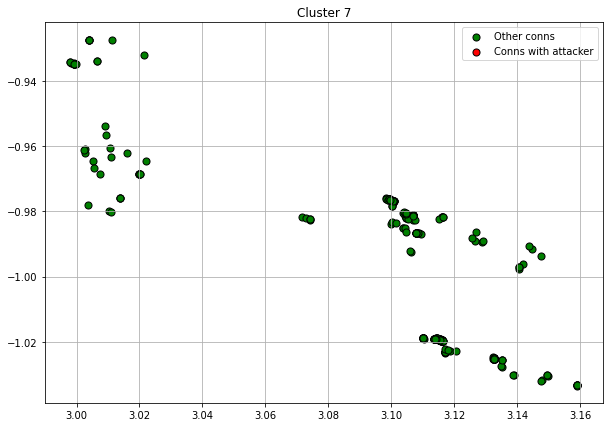

Total num of conns: 294

Attacker conns ratio:
No    294
Name: attacker_label, dtype: int64

IPs:
192.168.10.25    252
192.168.10.51     42
Name: originated_ip, dtype: int64

204.11.109.67     36
172.217.10.3      20
151.101.44.230    18
209.58.137.71     16
172.217.10.227    15
172.217.10.14     13
178.255.83.1      12
52.94.225.95      11
72.21.202.62      11
54.239.17.112     10
172.217.10.132     9
54.239.17.113      9
50.63.243.230      8
52.94.232.32       8
23.15.4.16         8
23.50.75.27        7
68.67.178.199      4
52.4.162.164       4
52.73.156.73       4
172.217.12.206     4
72.21.91.29        4
172.217.10.46      3
23.111.9.22        3
162.208.20.184     3
52.20.233.156      3
192.0.76.3         3
104.16.160.13      3
138.108.50.100     2
52.4.88.121        2
52.84.140.151      2
52.2.41.140        2
199.96.57.6        2
198.54.12.127      2
172.217.7.163      2
52.84.143.204      2
107.170.13.213     2
98.139.225.43      2
52.210.206.107     2
104.97.130.183     2
52.84.

uid  originated_ip_num  originated_ip  responded_ip_num  \
14869  CDvaI72QbQX2djYHDi            1.00000  192.168.10.25           0.93254   
7546    CRlW1XpDIt3VleWfa            1.00000  192.168.10.25           0.08231   
6145   CGh12d1etvV7WhmGM4            1.00000  192.168.10.25           0.90886   
10193   CILYxFq4Xin2kmACb            1.00000  192.168.10.25           0.30621   
11480   CAViqdqkV7Fd3ktqc            1.00000  192.168.10.51           0.20649   
5351   CWwoMP13kNaiWUH5A6            1.00000  192.168.10.25           0.76639   
5330   C1Uu4A32CUmPV8Qb5g            1.00000  192.168.10.25           0.22788   
14733  CdVMFg1kyP9lmloZ11            1.00000  192.168.10.25           0.21617   
870    Ci4pjy3cCa3EQnC87c            1.00000  192.168.10.25           0.46870   
17845   Clxg2e23Mv186ZUh9            1.00000  192.168.10.25           0.22788   
17968  C484B63ZZ43hn9Rg78            1.00000  192.168.10.25           0.22688   
2766    CbVlKM9jWP3b8Kgqh            1.00000  192.168.10.51           0.79447   
15831   CHXh9kKJqWwCMEcJc            1.00000  192.168.10.25           0.30621   
2406   Clcbhw4rTpRtGvMAQ9            1.00000  192.168.10.51           0.79447   
4383   CiV7V31cZn9DvfXtcd            1.00000  192.168.10.51           0.08293   

         responded_ip                    timestamp  connection.time  duration  \
14869   209.58.137.71  2017-07-04T17:49:41.116882Z          0.15618   0.27084   
7546       23.15.4.16   2017-07-04T17:49:45.22931Z          0.15847   0.32376   
6145    204.11.109.76  2017-07-04T17:49:39.168917Z          0.15510   0.53382   
10193    72.21.202.62  2017-07-04T17:51:03.640829Z          0.20204   0.52489   
11480   50.63.243.230  2017-07-04T17:46:54.543855Z          0.06362   2.31634   
5351   172.217.10.132  2017-07-04T17:49:54.649109Z          0.16370   0.16152   
5330    54.239.17.112  2017-07-04T17:49:46.370934Z          0.15910   0.17620   
14733    52.94.225.95  2017-07-04T17:49:47.068273Z          0.15949   0.38201   
870    107.170.13.213   2017-07-04T17:49:59.73885Z          0.16653   0.07234   
17845   54.239.17.112  2017-07-04T17:49:46.665447Z          0.15927   0.79827   
17968    54.183.69.21  2017-07-04T17:49:47.352157Z          0.15965   0.62718   
2766     178.255.83.1  2017-07-04T17:46:54.320351Z          0.06350   0.20033   
15831    72.21.202.62   2017-07-04T17:49:46.34078Z          0.15909   0.15773   
2406     178.255.83.1   2017-07-04T17:46:48.89198Z          0.06048   0.05142   
4383      23.50.75.27  2017-07-04T18:00:09.251112Z          0.50521 115.59198   

       connection.duration protocol service conn_state  connection.orig_p  \
14869              0.00016      tcp    http         SF            0.92563   
7546               0.00019      tcp    http         SF            0.92620   
6145               0.00032      tcp    http         SF            0.92528   
10193              0.00031      tcp    http         SF            0.93050   
11480              0.00138      tcp    http         SF            0.61611   
5351               0.00010      tcp    http         SF            0.92829   
5330               0.00010      tcp    http         SF            0.92667   
14733              0.00023      tcp    http         SF            0.92710   
870                0.00004      tcp    http         SF            0.92884   
17845              0.00047      tcp    http         SF            0.92692   
17968              0.00037      tcp    http         SF            0.92721   
2766               0.00012      tcp    http         SF            0.90114   
15831              0.00009      tcp    http         SF            0.92646   
2406               0.00003      tcp    http         SF            0.90065   
4383               0.06876      tcp    http         SF            0.64155   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
14869   60657  orig_reg_or_dyn                0.00653      652   
7546    60694  orig_reg_or_dyn                0.00377      377 

Protocol:
tcp    294
Name: protocol, dtype: int64

Service:
http    294
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    294
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80    294
Name: resp_p_cat, dtype: int64




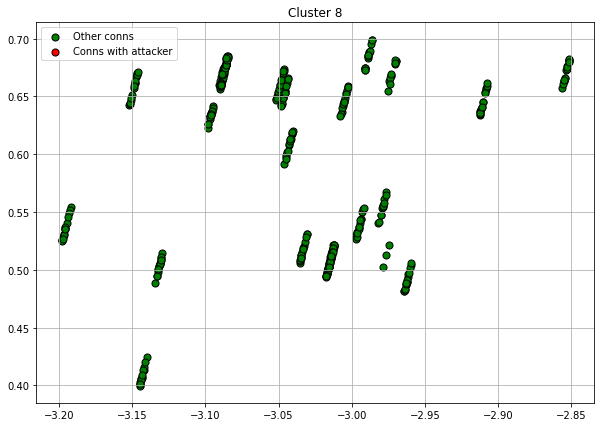

Total num of conns: 383

Attacker conns ratio:
No    383
Name: attacker_label, dtype: int64

IPs:
192.168.10.50    383
Name: originated_ip, dtype: int64

192.168.10.3    383
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-04T17:47:19.516783Z
timestamp max = 2017-07-04T18:14:16.818889Z

Cluster 8 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
16346  CnAqHc3UzF0u0uf5sc            1.00000  192.168.10.50           0.85685   
5372   Cbo4tD37rYL1aIN9n8            1.00000  192.168.10.50           0.85685   
138    C4BioI3pQ5i41yIul6            1.00000  192.168.10.50           0.85685   
9544    CzwQABuvXwRHrqqva            1.00000  192.168.10.50           0.85685   
952    CVmO0O21Bw3rVzwhx3            1.00000  192.168.10.50           0.85685   
6196   CLLqry3g4FzknfE5Pg            1.00000  192.168.10.50           0.85685   
10513  CaUVdW3Pou3GZ6dxfc            1.00000  192.168.10.50           0.85685   
1534   CWK8V52IjTHBp9Kqg9            1.00000  192.168.10.50           0.85685   
562    CkbJqJ130XpYHOPrr9            1.00000  192.168.10.50           0.85685   
15163   CL3uaI1NXLq8S6XpE            1.00000  192.168.10.50           0.85685   
388    CG3ow54MkqMfT5JcY7            1.00000  192.168.10.50           0.85685   
12041  CQgzlU2hDzxylWKgw1            1.00000  192.168.10.50           0.85685   
11804  CW7Jfi1crw8Fqm3FAh            1.00000  192.168.10.50           0.85685   
5082   COIIc72gqHGbLPM0P9            1.00000  192.168.10.50           0.85685   
10308  C75tgz12aEhXDlva66            1.00000  192.168.10.50           0.85685   

       responded_ip                    timestamp  connection.time  duration  \
16346  192.168.10.3  2017-07-04T18:13:21.669088Z          0.94553   0.00019   
5372   192.168.10.3  2017-07-04T18:01:21.680374Z          0.54546   0.00017   
138    192.168.10.3  2017-07-04T18:01:21.681242Z          0.54546   0.00016   
9544   192.168.10.3   2017-07-04T17:55:21.66901Z          0.34542   0.00020   
952    192.168.10.3  2017-07-04T17:52:38.512066Z          0.25476   0.04921   
6196   192.168.10.3  2017-07-04T18:09:31.256116Z          0.81750   0.00021   
10513  192.168.10.3  2017-07-04T17:53:19.529361Z          0.27755   0.00020   
1534   192.168.10.3  2017-07-04T18:09:31.270249Z          0.81751   0.00016   
562    192.168.10.3  2017-07-04T18:05:19.496815Z          0.67761   0.00018   
15163  192.168.10.3  2017-07-04T18:02:16.848839Z          0.57612   0.00014   
388    192.168.10.3  2017-07-04T17:59:19.522816Z          0.47758   0.00019   
12041  192.168.10.3  2017-07-04T17:56:16.858819Z          0.37608   0.00026   
11804  192.168.10.3  2017-07-04T18:09:31.281735Z          0.81751   0.00019   
5082   192.168.10.3  2017-07-04T18:14:16.815983Z          0.97618   0.00026   
10308  192.168.10.3  2017-07-04T18:13:21.669695Z          0.94553   0.00018   

       connection.duration protocol service conn_state  connection.orig_p  \
16346              0.00000      udp     dns         SF            0.67236   
5372               0.00000      udp     dns         SF            0.92438   
138                0.00000      udp     dns         SF            0.53854   
9544               0.00000      udp     dns         SF            0.17484   
952                0.00003      udp     dns         SF            0.49500   
6196               0.00000      udp     dns         SF            0.72057   
10513              0.00000      udp     dns         SF            0.41058   
1534               0.00000      udp     dns         SF            0.89241   
562                0.00000      udp     dns         SF            0.41383   
15163              0.00000      udp     dns         SF            0.03049   
388                0.00000      udp     dns         SF            0.47351   
12041              0.00000      udp     dns         SF            0.96511   
11804              0.00000      udp     dns         SF            0.11757   
5082               0.00000      udp     dns         SF            0.89871   
10308              0.00000      udp     dns         SF            0.12662   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
16346   44061  orig_reg_or_dyn                0.00046       46   
5372    60575  orig_reg_or_dyn                0.00046       46   
138     35292  orig_reg_or_dy

Protocol:
udp    383
Name: protocol, dtype: int64

Service:
dns    383
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    383
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    383
Name: resp_p_cat, dtype: int64




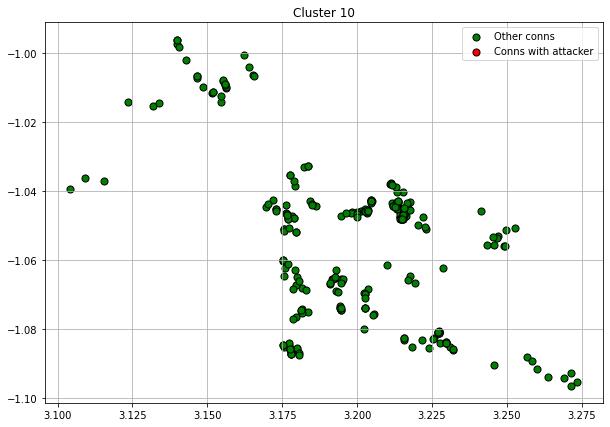

Total num of conns: 266

Attacker conns ratio:
No    266
Name: attacker_label, dtype: int64

IPs:
192.168.10.25    266
Name: originated_ip, dtype: int64

52.3.127.200       22
172.217.10.35      21
74.125.22.157      11
54.197.238.119     11
172.217.10.130     11
172.217.12.163     11
172.217.5.228      11
172.217.1.162      11
172.217.11.8       11
172.217.12.138     11
172.217.3.104      11
104.97.127.199     11
172.217.6.196      10
34.203.126.24      10
52.22.205.9        10
173.194.205.157    10
172.217.7.163      10
173.194.205.155    10
54.236.115.212     10
104.97.139.37       7
52.205.99.58        6
209.58.137.71       6
172.217.10.227      5
172.217.11.14       4
52.3.205.157        4
172.217.11.36       3
23.34.74.210        3
173.194.68.154      3
172.217.11.34       2
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-04T17:45:22.805222Z
timestamp max = 2017-07-04T18:14:49.306783Z

Cluster 10 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
3662    Cj1C1t3N3A25lOhi5            1.00000  192.168.10.25           0.77056   
1865    CpmxqS2pBqIe4Bh5S            1.00000  192.168.10.25           0.21454   
12074  CtKKCD2ZofsOcLOQge            1.00000  192.168.10.25           0.13590   
4855     CLqzs8Dgzj7rxpdk            1.00000  192.168.10.25           0.21455   
4024   CwQH6d2H0TDPnuZetg            1.00000  192.168.10.25           0.76639   
6609   CSGz2p3i4uBq1Upyt6            1.00000  192.168.10.25           0.76639   
3404    CpazJQ1AgAOLJjOpd            1.00000  192.168.10.25           0.21489   
17837   CtUle51ffrWGFfCcU            1.00000  192.168.10.25           0.21489   
10984  CTJF5n1ULvNSGZbMni            1.00000  192.168.10.25           0.77056   
16722   C3Im1X0STopeHWoxk            1.00000  192.168.10.25           0.21489   
14762  CgyyHF39iKMU0fJt7j            1.00000  192.168.10.25           0.76639   
12145   CKdXBEG3T2CfJlwG3            1.00000  192.168.10.25           0.76639   
3023   CB1yqY3QYwdo5onEo2            1.00000  192.168.10.25           0.76639   
15083  CJIafk4FanAzWoIgzl            1.00000  192.168.10.25           0.76639   
8039   Ct3lGj4XEWut6caaK7            1.00000  192.168.10.25           0.21454   

          responded_ip                    timestamp  connection.time  \
3662   173.194.205.155  2017-07-04T18:07:47.346171Z          0.75976   
1865      52.3.127.200  2017-07-04T17:56:39.138589Z          0.38846   
12074    34.203.126.24  2017-07-04T17:56:31.632068Z          0.38429   
4855      52.3.205.157  2017-07-04T17:47:30.925359Z          0.08384   
4024     172.217.10.35  2017-07-04T18:11:18.328484Z          0.87700   
6609      172.217.11.8  2017-07-04T17:47:19.915874Z          0.07772   
3404       52.22.205.9  2017-07-04T18:01:40.521078Z          0.55593   
17837      52.22.205.9  2017-07-04T18:04:20.665026Z          0.64492   
10984  173.194.205.155  2017-07-04T18:00:34.963005Z          0.51950   
16722      52.22.205.9  2017-07-04T18:08:36.889109Z          0.78729   
14762   172.217.10.227  2017-07-04T18:01:23.506867Z          0.54648   
12145    172.217.10.35  2017-07-04T17:54:12.294922Z          0.30687   
3023    172.217.12.163  2017-07-04T17:53:16.842255Z          0.27605   
15083    172.217.7.163  2017-07-04T17:57:51.507991Z          0.42868   
8039      52.3.127.200  2017-07-04T17:53:34.058915Z          0.28562   

       duration  connection.duration protocol service conn_state  \
3662    0.00000              0.00000      tcp    none         SH   
1865    0.00000              0.00000      tcp    none         SH   
12074   0.00000              0.00000      tcp    none         SH   
4855    0.00000              0.00000      tcp    none         SH   
4024    0.00000              0.00000      tcp    none         SH   
6609    0.00000              0.00000      tcp    none         SH   
3404    0.00000              0.00000      tcp    none         SH   
17837   0.00000              0.00000      tcp    none         SH   
10984   0.00000              0.00000      tcp    none         SH   
16722   0.00000              0.00000      tcp    none         SH   
14762   0.00000              0.00000      tcp    none         SH   
12145   0.00000              0.00000      tcp    none         SH   
3023    0.00000              0.00000      tcp    none         SH   
15083   0.00000              0.00000      tcp    none         SH   
8039    0.00000              0.00000      tcp    none         SH   

       connection.orig_p  o_port       orig_p_cat  connection.orig_bytes  \
3662             0.93429   61224  orig_reg_or_dyn                0.00000   
1865             0.93154   61044  orig_reg_or_dyn                0.00000   
12074            0.92379   60536  orig_reg_or_dyn                0.00000   
4855             0.91286   59820  orig_reg_or_dyn                0.00000   
4024             0.93775   61451  orig_reg_or_dyn                0.00000   
6609             0.90396   

Protocol:
tcp    266
Name: protocol, dtype: int64

Service:
none    266
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    266
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443    260
resp_80       6
Name: resp_p_cat, dtype: int64




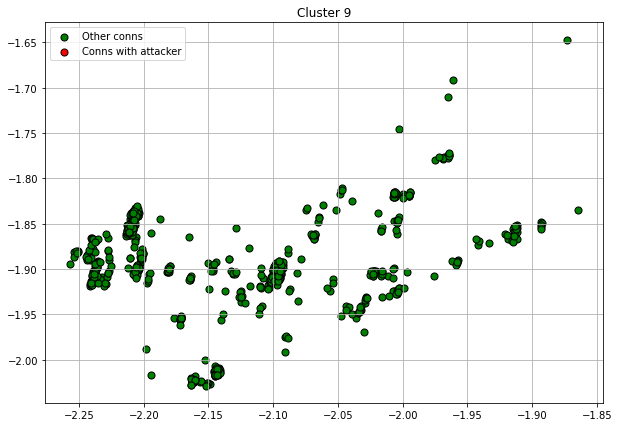

Total num of conns: 675

Attacker conns ratio:
No    675
Name: attacker_label, dtype: int64

IPs:
192.168.10.51    366
192.168.10.25    309
Name: originated_ip, dtype: int64

192.168.10.3    675
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-04T17:45:00.659633Z
timestamp max = 2017-07-04T18:14:54.818446Z

Cluster 9 OK sample connections:


uid  originated_ip_num  originated_ip  responded_ip_num  \
16402    CGvZQGetQVcy89n9            1.00000  192.168.10.25           0.85685   
13011  CghANc1dnoENLPC6v5            1.00000  192.168.10.51           0.85685   
698    C3jb593pbwwKzL3Npl            1.00000  192.168.10.25           0.85685   
15234  CJGzFD2Oi3FmDrii1j            1.00000  192.168.10.25           0.85685   
7318    COxtVzv2CFuEFgLU1            1.00000  192.168.10.51           0.85685   
10749  CiwgoZ3eaeOl0WCg5f            1.00000  192.168.10.25           0.85685   
8067    C6hc6w2ShMdsFhrIv            1.00000  192.168.10.51           0.85685   
8591   Cz0NAt4PbhDz2VRxOf            1.00000  192.168.10.51           0.85685   
16886   ClCxR12fqVj2sxi1A            1.00000  192.168.10.25           0.85685   
14108  CP4IT31USwHgKZ8kNc            1.00000  192.168.10.51           0.85685   
9314   C2Zlhq2FP9hbT5Yipk            1.00000  192.168.10.25           0.85685   
9227   CIk1Gj4BQWvDBDekR1            1.00000  192.168.10.25           0.85685   
7105   CwyLFA3VjqErTq08J1            1.00000  192.168.10.51           0.85685   
14022  Cmfc2y46dHgWlYR2ll            1.00000  192.168.10.25           0.85685   
15624  CqCjqG2wOFAAOLwCTc            1.00000  192.168.10.25           0.85685   

       responded_ip                    timestamp  connection.time  duration  \
16402  192.168.10.3  2017-07-04T18:12:43.183125Z          0.92415   0.02450   
13011  192.168.10.3  2017-07-04T18:01:15.923076Z          0.54226   0.00025   
698    192.168.10.3  2017-07-04T18:00:19.974917Z          0.51117   0.06123   
15234  192.168.10.3  2017-07-04T18:10:36.937998Z          0.85400   0.07773   
7318   192.168.10.3  2017-07-04T18:00:17.886293Z          0.51001   0.00025   
10749  192.168.10.3   2017-07-04T17:46:39.63039Z          0.05534   0.06025   
8067   192.168.10.3  2017-07-04T18:01:15.601672Z          0.54208   0.06037   
8591   192.168.10.3  2017-07-04T17:53:47.781073Z          0.29325   0.05006   
16886  192.168.10.3  2017-07-04T17:49:42.460112Z          0.15693   0.05211   
14108  192.168.10.3   2017-07-04T18:00:17.46955Z          0.50978   0.00018   
9314   192.168.10.3  2017-07-04T18:01:19.628467Z          0.54432   0.00018   
9227   192.168.10.3   2017-07-04T17:46:00.89701Z          0.03382   0.08745   
7105   192.168.10.3   2017-07-04T18:01:17.74831Z          0.54328   0.00021   
14022  192.168.10.3  2017-07-04T18:13:43.183098Z          0.95749   0.03110   
15624  192.168.10.3  2017-07-04T17:49:39.226041Z          0.15513   0.04800   

       connection.duration protocol service conn_state  connection.orig_p  \
16402              0.00001      udp     dns         SF            0.97152   
13011              0.00000      udp     dns         SF            0.71867   
698                0.00004      udp     dns         SF            0.77872   
15234              0.00005      udp     dns         SF            0.76868   
7318               0.00000      udp     dns         SF            0.34770   
10749              0.00004      udp     dns         SF            0.81424   
8067               0.00004      udp     dns         SF            0.69898   
8591               0.00003      udp     dns         SF            0.71465   
16886              0.00003      udp     dns         SF            0.93925   
14108              0.00000      udp     dns         SF            0.24744   
9314               0.00000      udp     dns         SF            0.93049   
9227               0.00005      udp     dns         SF            0.88260   
7105               0.00000      udp     dns         SF            0.96612   
14022              0.00002      udp     dns         SF            0.94593   
15624              0.00003      udp     dns         SF            0.95756   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
16402   63664  orig_reg_or_dyn                0.00068       68   
13011   47095  orig_reg_or_dyn                0.00066       66   
698     51030  orig_reg_or_dy

Protocol:
udp    675
Name: protocol, dtype: int64

Service:
dns    675
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    675
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    675
Name: resp_p_cat, dtype: int64




In [39]:
for i in pca_X['cluster'].unique():
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')
    
    print('Time:')
    print_df_func(result_cluster, 'timestamp', 'min')
    print_df_func(result_cluster, 'timestamp', 'max')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

In [40]:
df['uid'] = result['uid']
df['originated_ip_num'] = result['originated_ip_num']
df['originated_ip'] = result['originated_ip']
df['responded_ip_num'] = result['responded_ip_num']
df['responded_ip'] = result['responded_ip']
df['timestamp'] = result['timestamp']
df['duration'] = result['duration']
df['protocol'] = result['protocol']
df['service'] = result['service']
df['conn_state'] = result['conn_state']
df['o_port'] = result['o_port']
df['orig_p_cat'] = result['orig_p_cat']
df['o_bytes'] = result['o_bytes']
#df['o_ip_bytes'] = result['o_ip_bytes']
df['r_port'] = result['r_port']
df['resp_p_cat'] = result['resp_p_cat']
df['r_bytes'] = result['r_bytes']
#df['r_ip_bytes'] = result['r_ip_bytes']
df['attacker_label'] = result['attacker_label']
df['victim_label'] = result['victim_label']
df['cluster'] = y_db
df

connection.time  connection.duration  connection.orig_p  \
0              0.45853              0.00004            0.95348   
1              0.48580              0.00003            0.79615   
2              0.42797              0.00008            0.05753   
3              0.48513              0.06931            0.89465   
4              0.46120              0.00009            0.93279   
...                ...                  ...                ...   
18597          0.13567              0.00000            0.90888   
18598          0.76004              0.00000            0.93435   
18599          0.97881              0.00002            0.00183   
18600          0.05910              0.06917            0.79648   
18601          0.54818              0.00000            0.56336   

       connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                    0.00054               0.00068            0.00079   
1                    0.00172               0.00270            0.00079   
2                    0.00070               0.00135            0.00079   
3                    0.00861               0.01284            0.00122   
4                    0.00055               0.00068            0.00079   
...                      ...                   ...                ...   
18597                0.00060               0.00135            0.00079   
18598                0.00000               0.00068            0.00695   
18599                0.00048               0.00068            0.00189   
18600                0.00856               0.01689            0.00695   
18601                0.00078               0.00135            0.00079   

       connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                    0.00003               0.00048    1.00000    0.00000   
1                    0.00005               0.00096    1.00000    0.00000   
2                    0.00008               0.00096    1.00000    0.00000   
3                    0.00113               0.00866    0.00000    0.00000   
4                    0.00004               0.00048    1.00000    0.00000   
...                      ...                   ...        ...        ...   
18597                0.00003               0.00096    1.00000    0.00000   
18598                0.00000               0.00000    0.00000    0.00000   
18599                0.00001               0.00048    0.00000    0.00000   
18600                0.00266               0.01106    0.00000    0.00000   
18601                0.00005               0.00096    1.00000    0.00000   

       http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0         0.00000    0.00000      0.00000                           1   
1         0.00000    0.00000      0.00000                           1   
2         0.00000    0.00000      0.00000                           1   
3         1.00000    0.00000      0.12500                           1   
4         0.00000    0.00000      0.00000                           1   
...           ...        ...          ...                         ...   
18597     0.00000    0.00000      0.00000                           1   
18598     0.00000    0.00000      0.00000                           1   
18599     0.00000    0.00000      0.00000                           0   
18600     0.00000    1.00000      0.06250                           1   
18601     0.00000    0.00000      0.00000                           1   

       orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                               0                    0                   0   
1                               0                    0                   0   
2                               0                    0                   0   
3                               0                    0                   0   
4                               0                    0                   0   
...                           ...                  ...                 ...   
1

## Evaluation

Metric that quantifies level of separation and cohesion in a single measure:

### Silhouette Score

- used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other
- is calculated for each sample of different clusters
- to calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters: Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a. Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

Silhouette score, S, for each sample is calculated using the following formula:

```
Silhouette Score = (average intra-cluster distance - average inter-cluster distance) / 
                   max(average inter-cluster distance, average intra-cluster distance)

```

- intra-cluster distance = average distance between each point within a cluster
- inter-cluster distance = average distance between all clusters

Value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

In [42]:
from sklearn import metrics

labels = db_fitted.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(pca_X, labels))

Estimated number of clusters: 11
Estimated number of noise points: 3044
Silhouette Coefficient: 0.613


## Interpretation

Parallel coordinates plots.

In [43]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

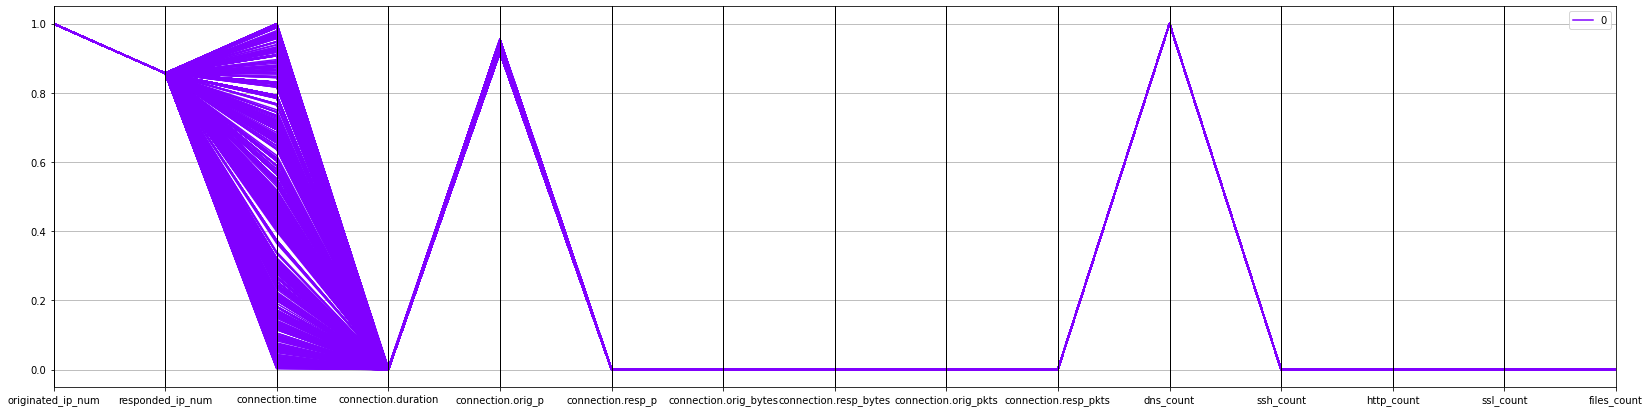

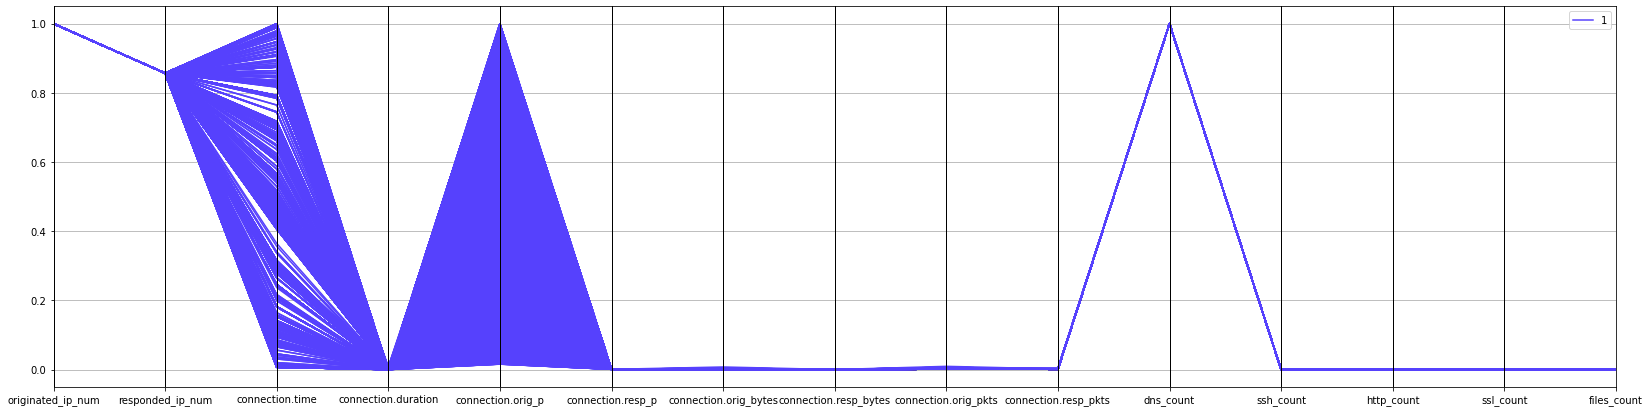

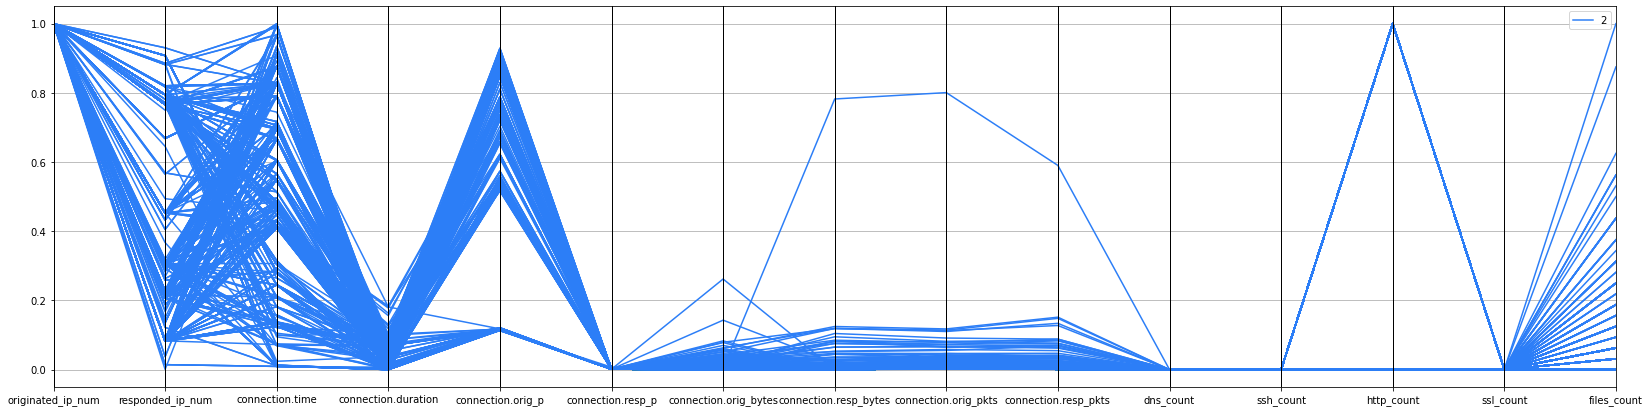

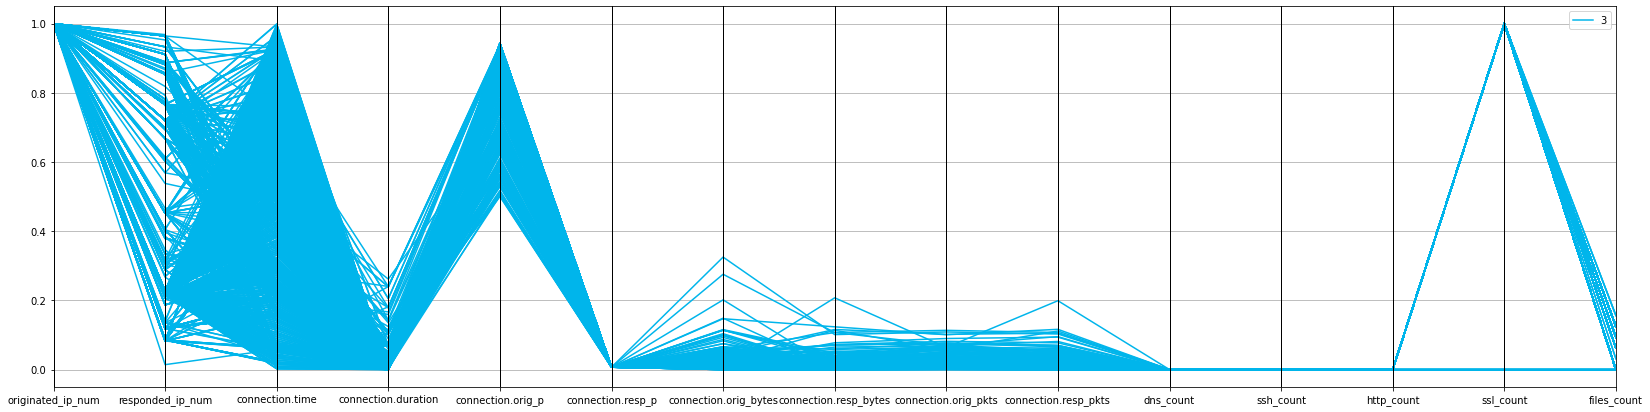

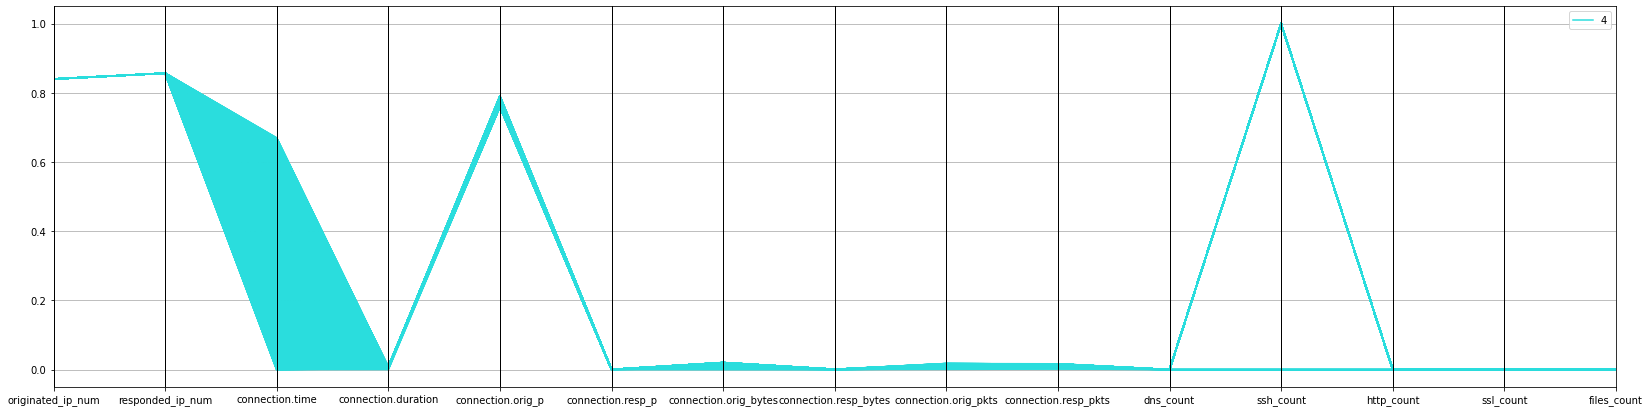

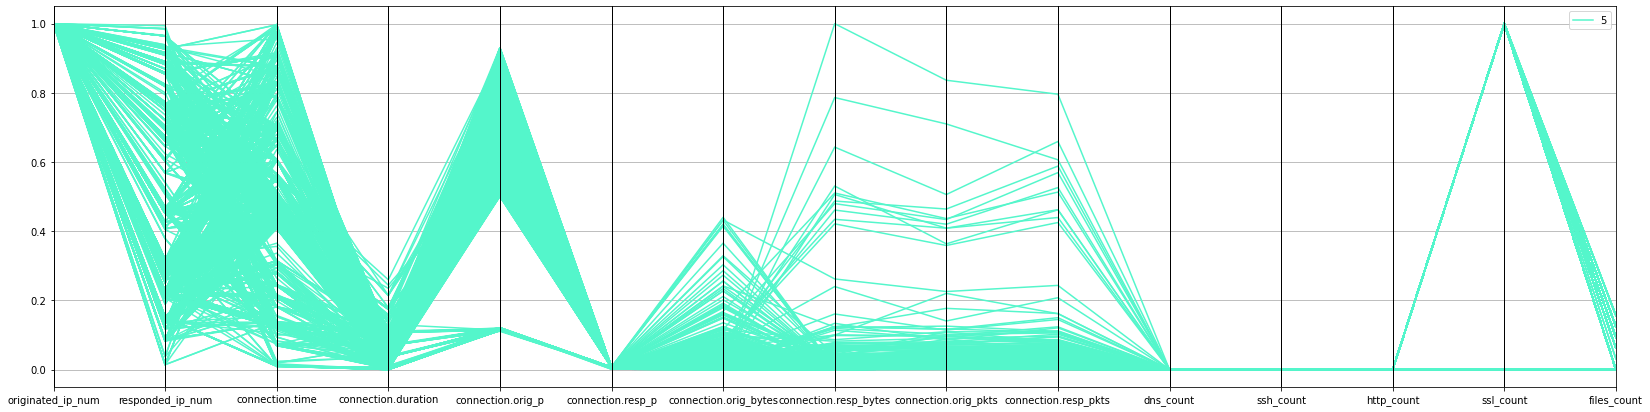

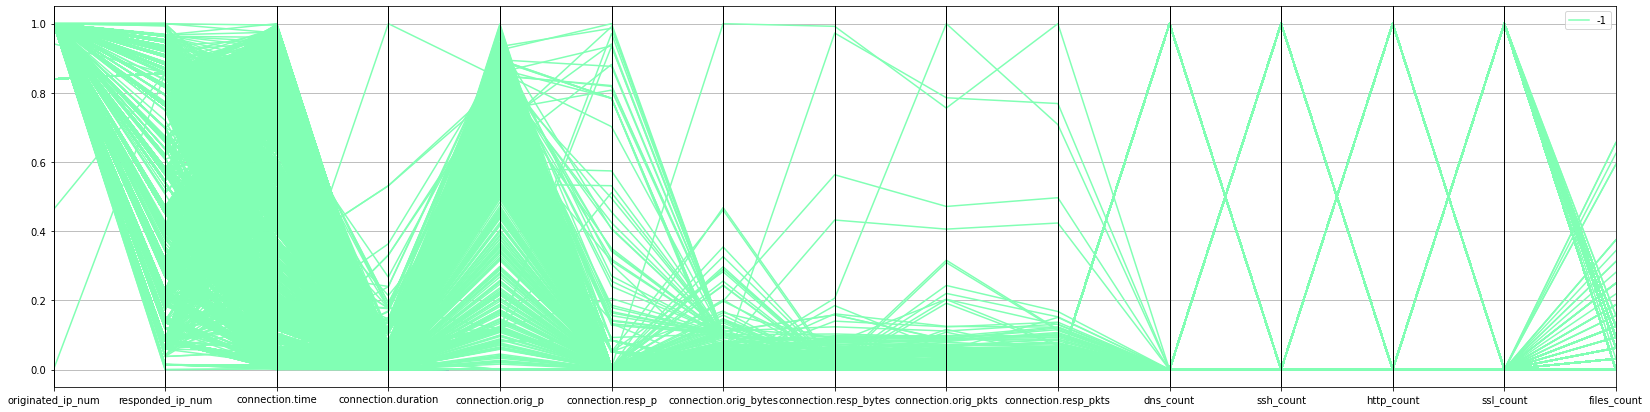

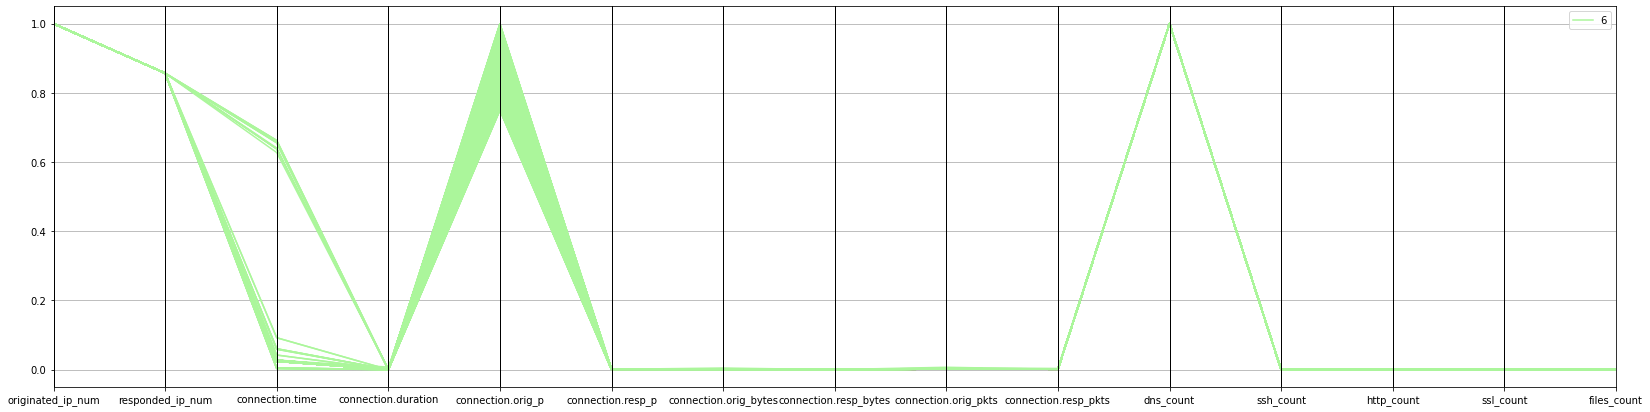

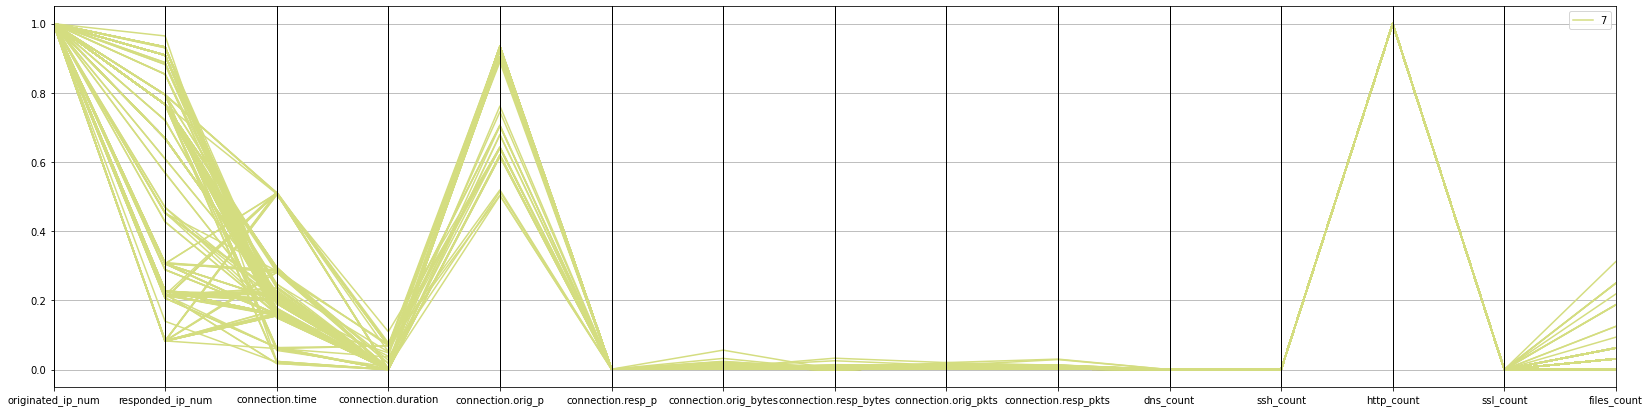

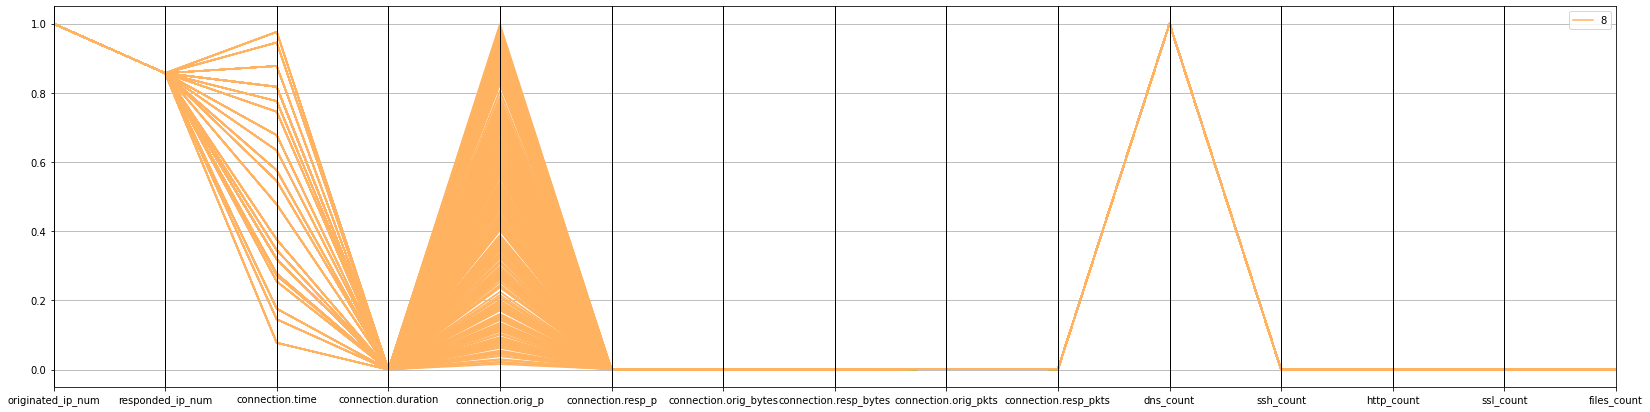

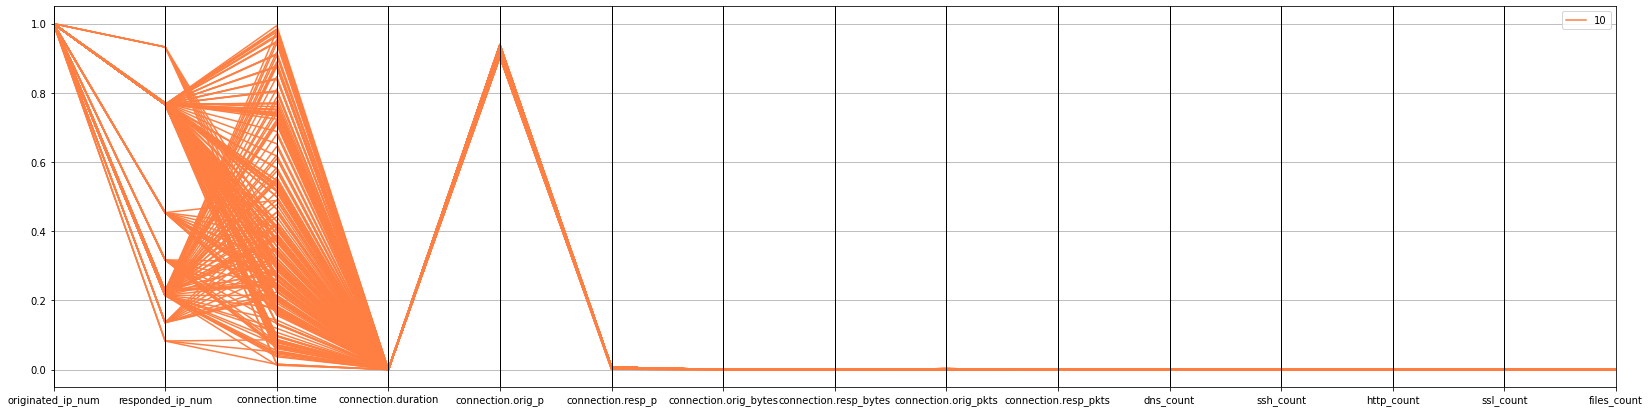

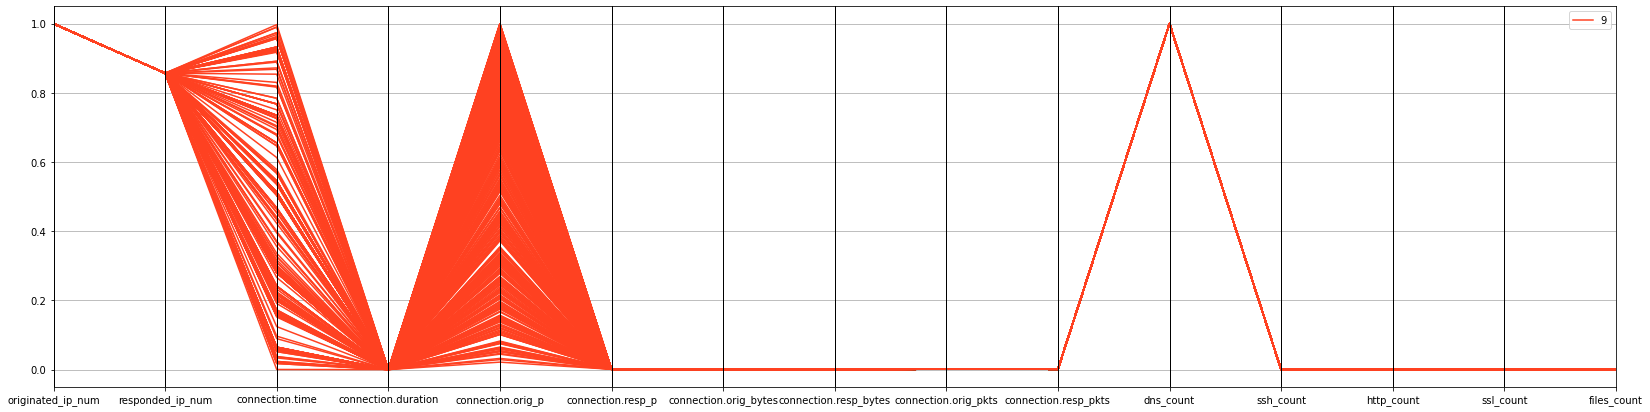

In [44]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

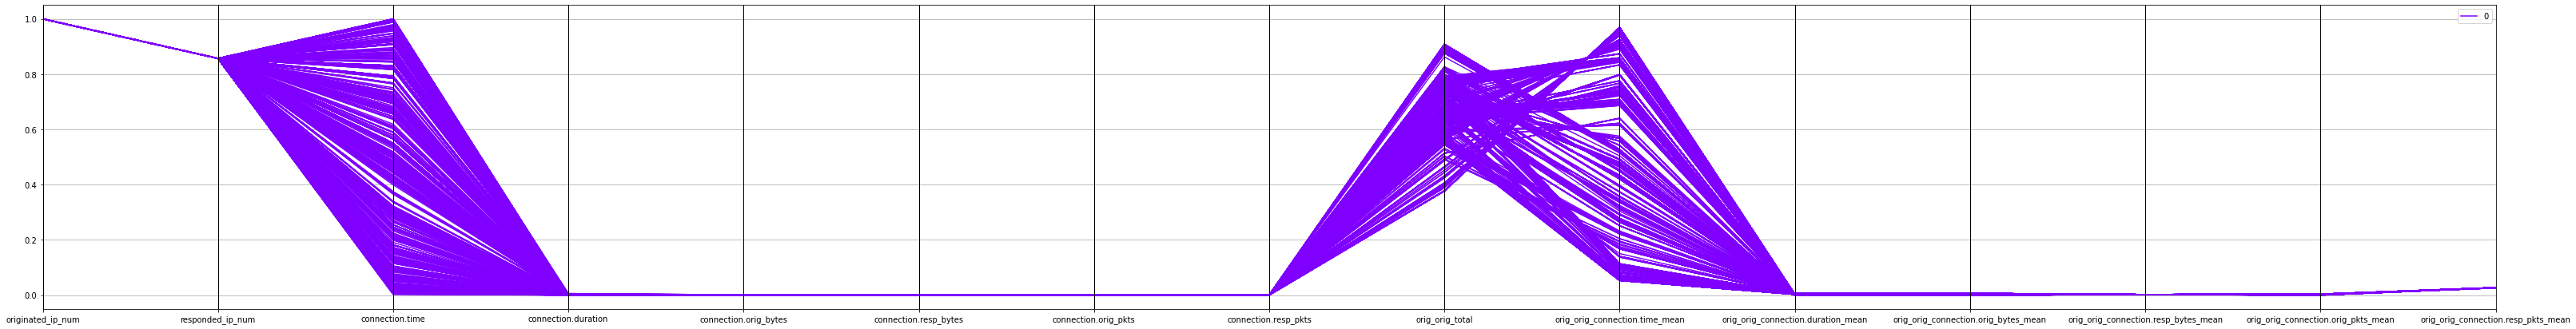

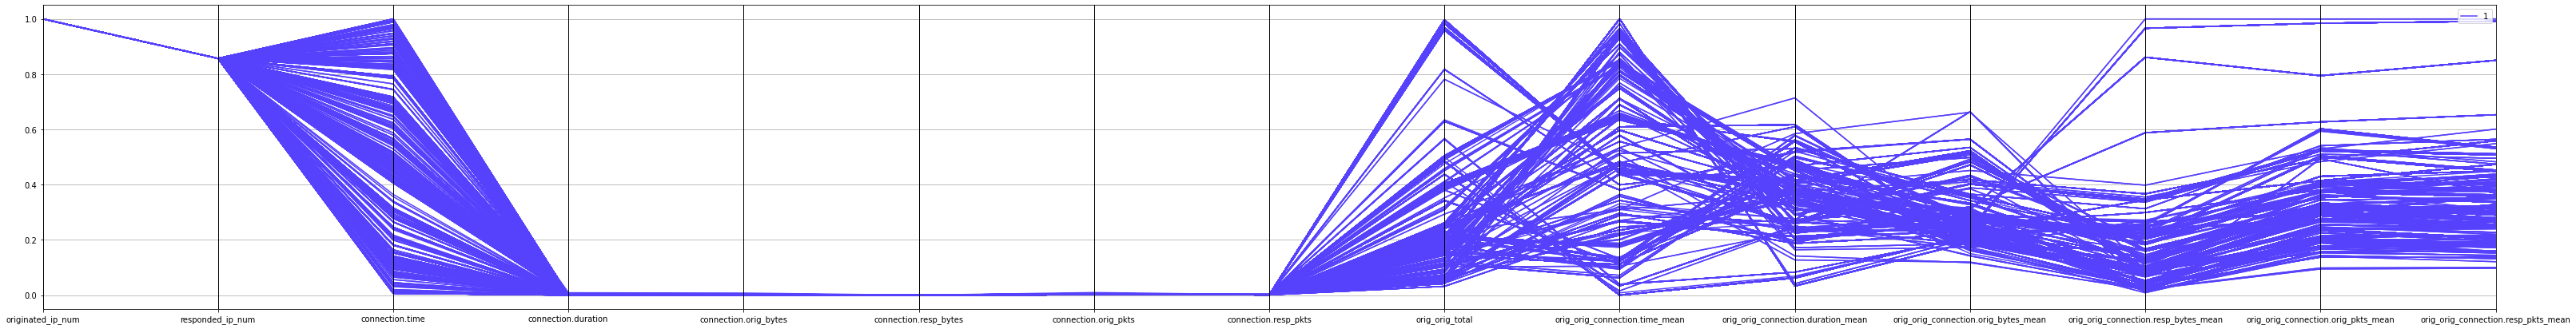

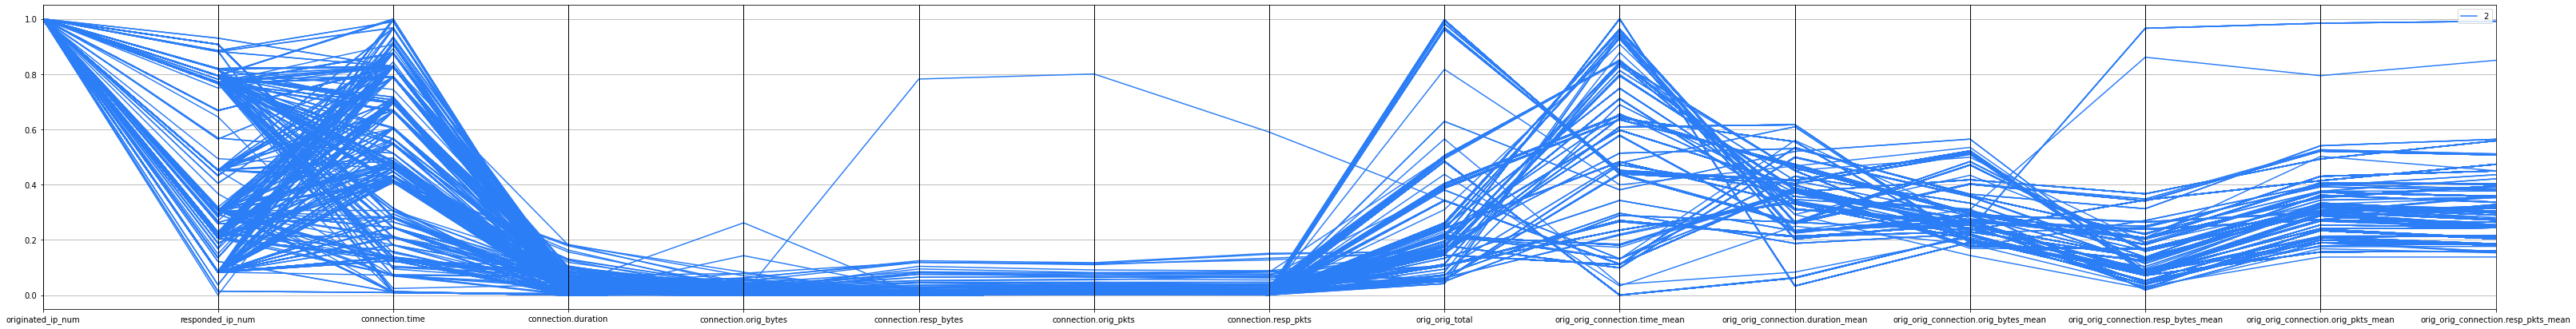

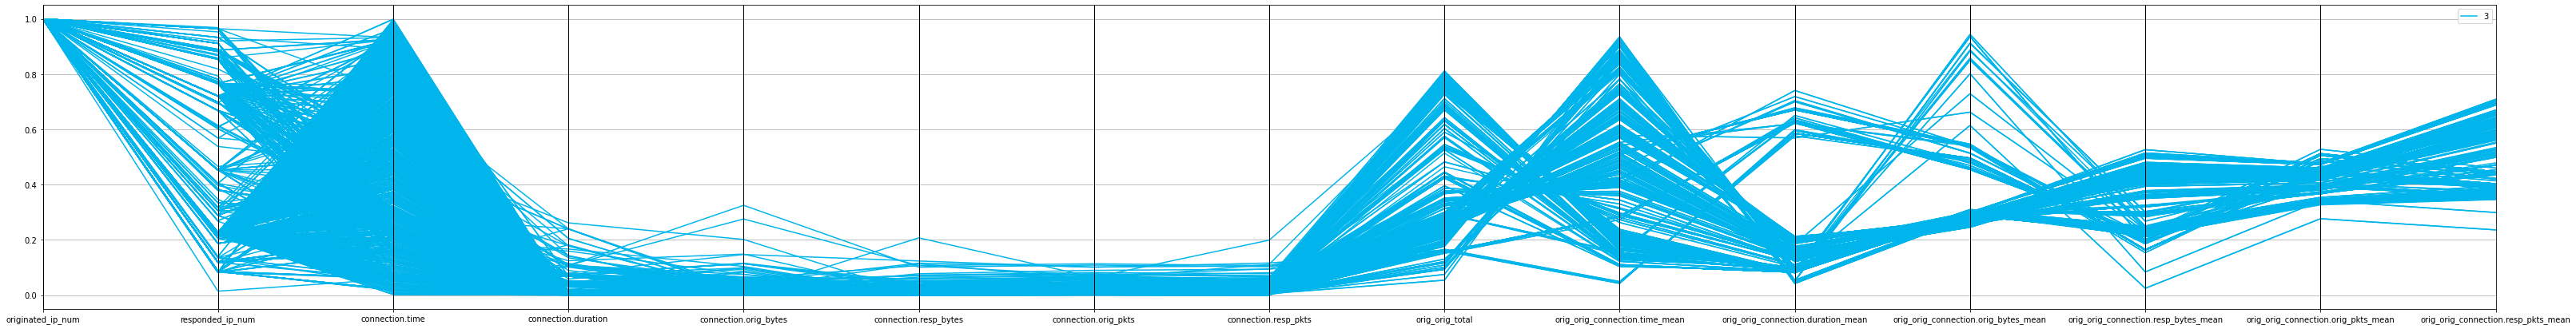

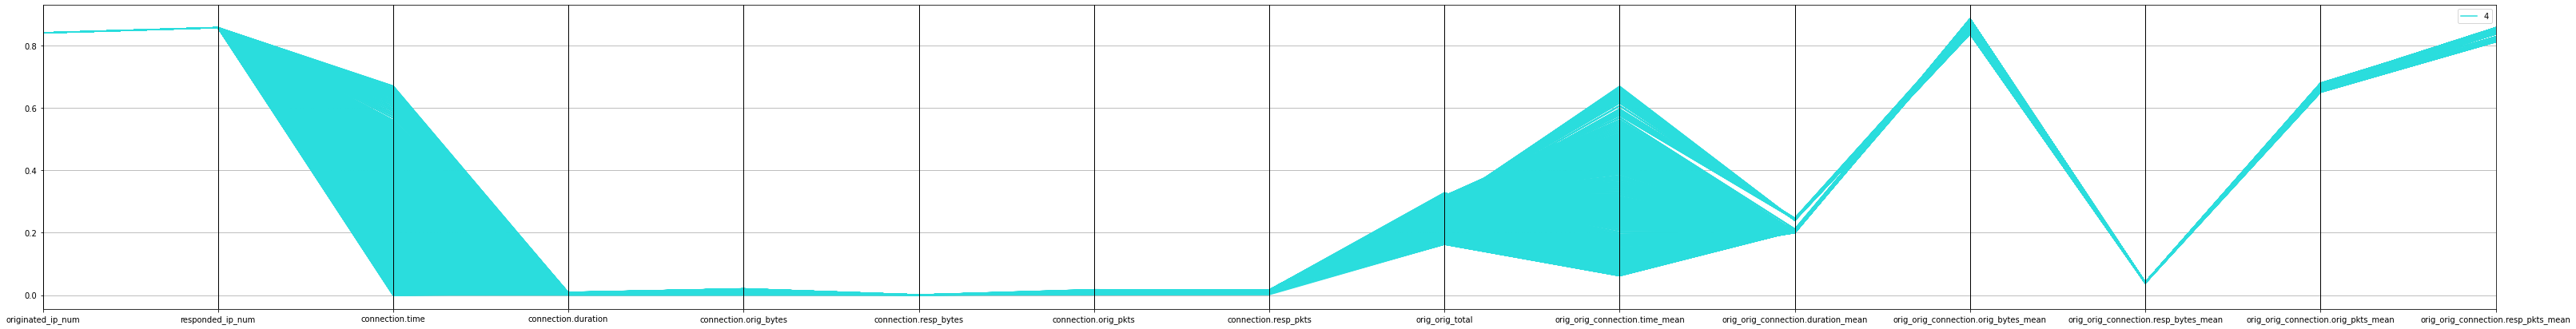

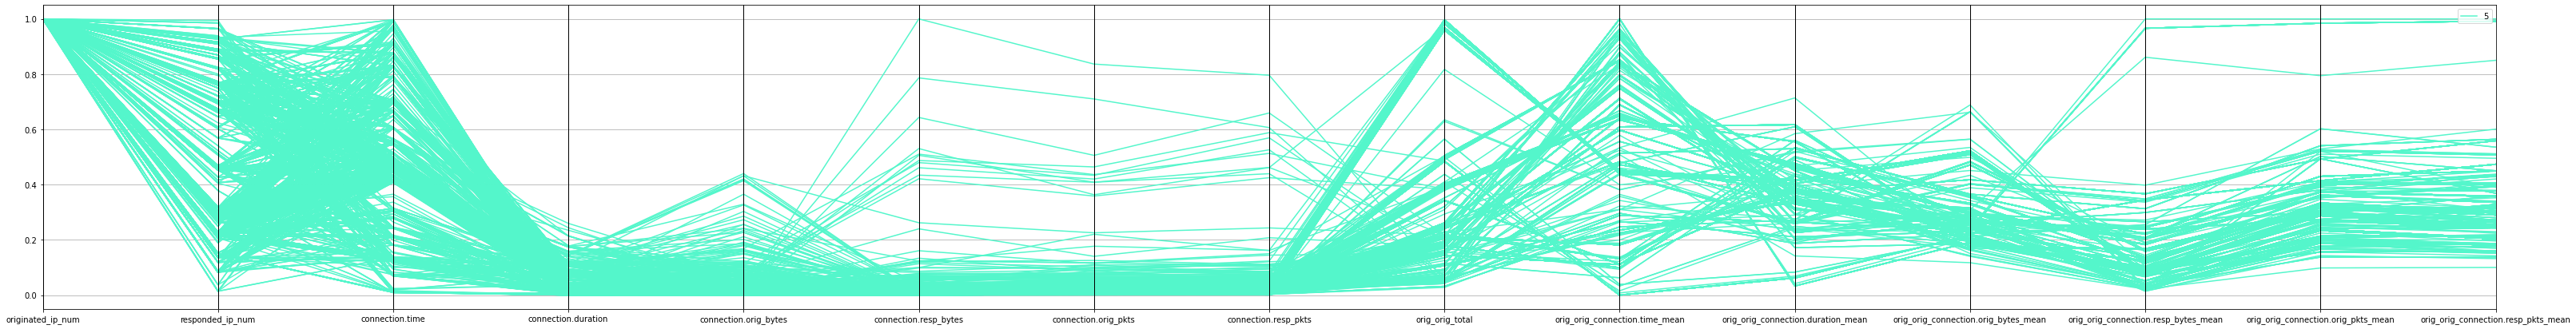

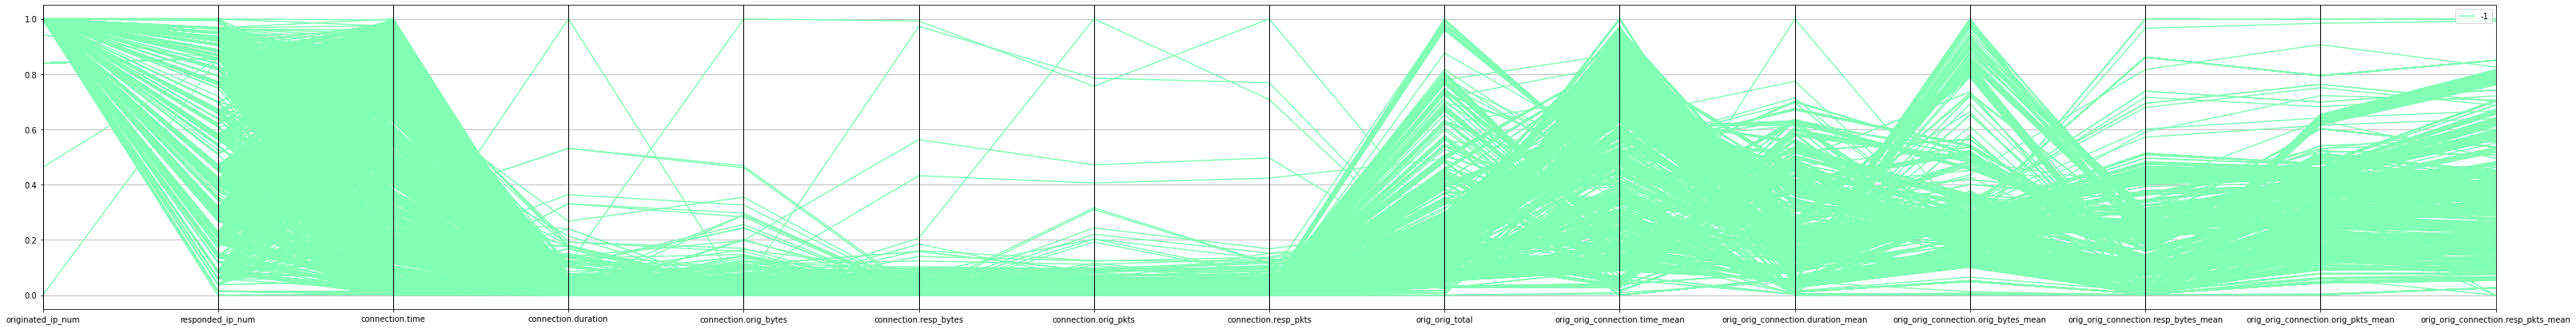

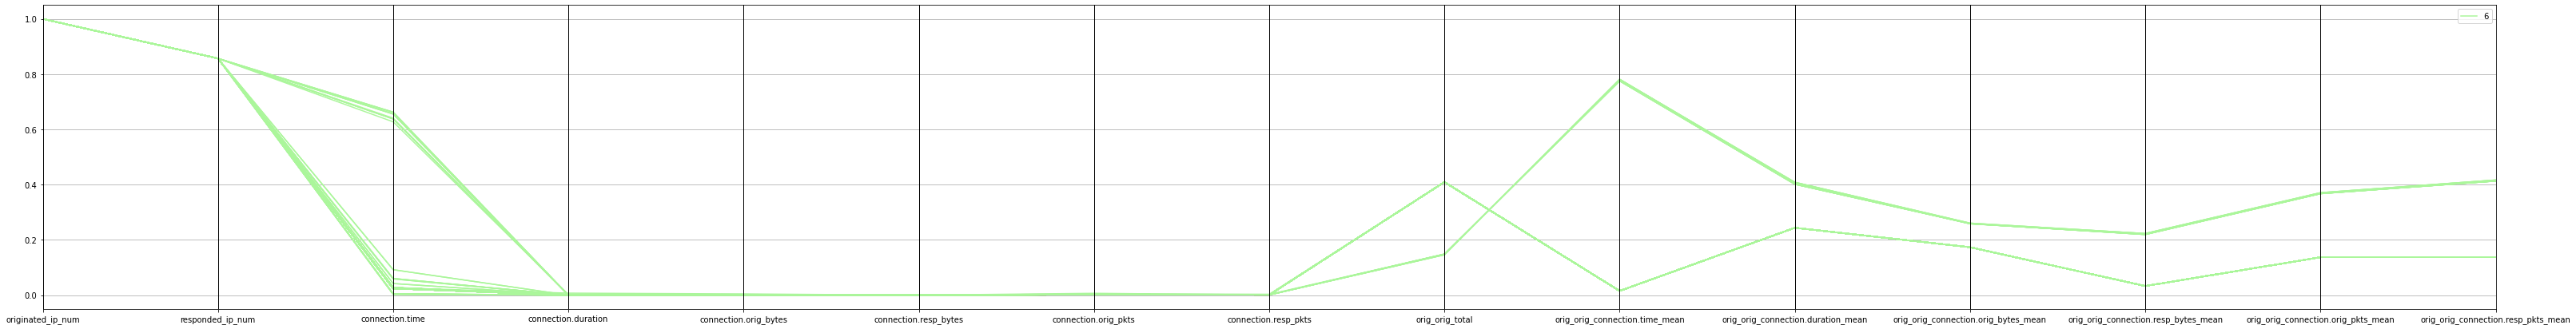

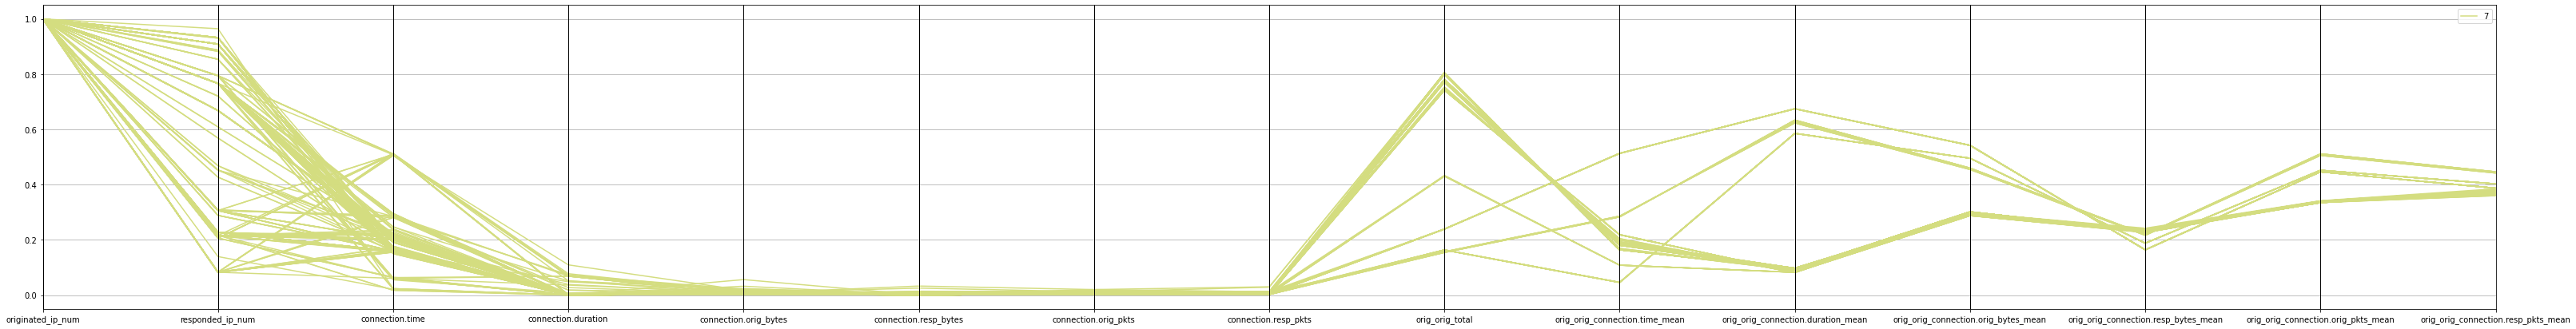

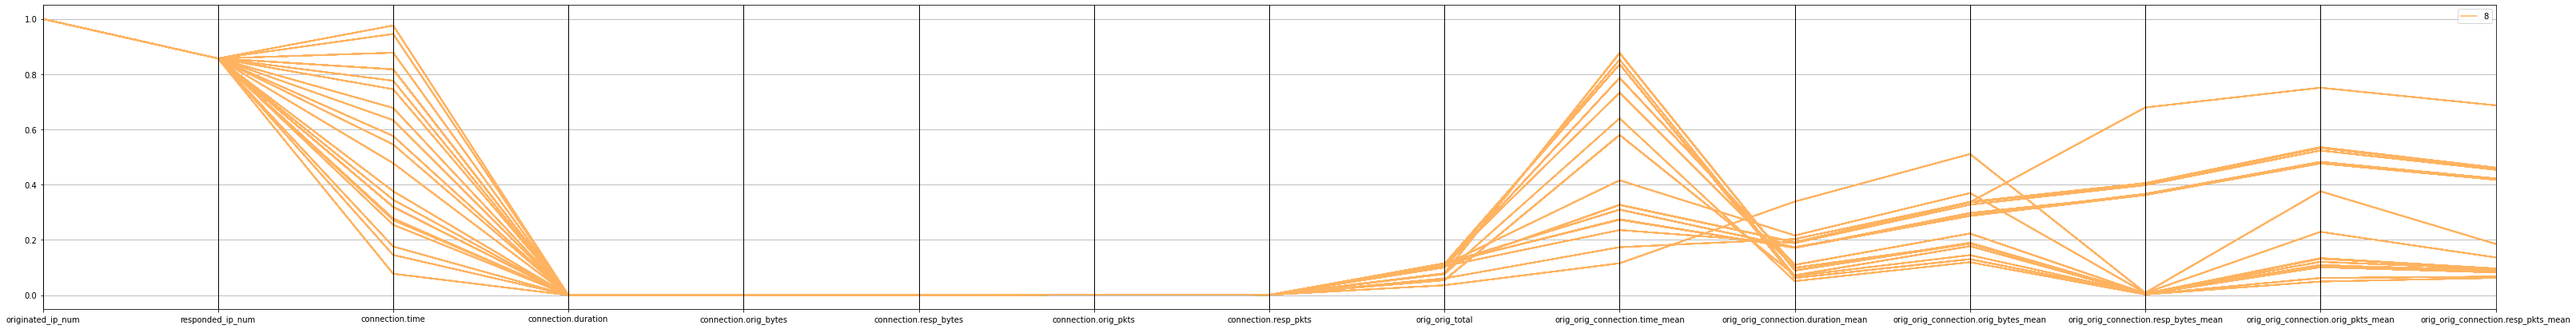

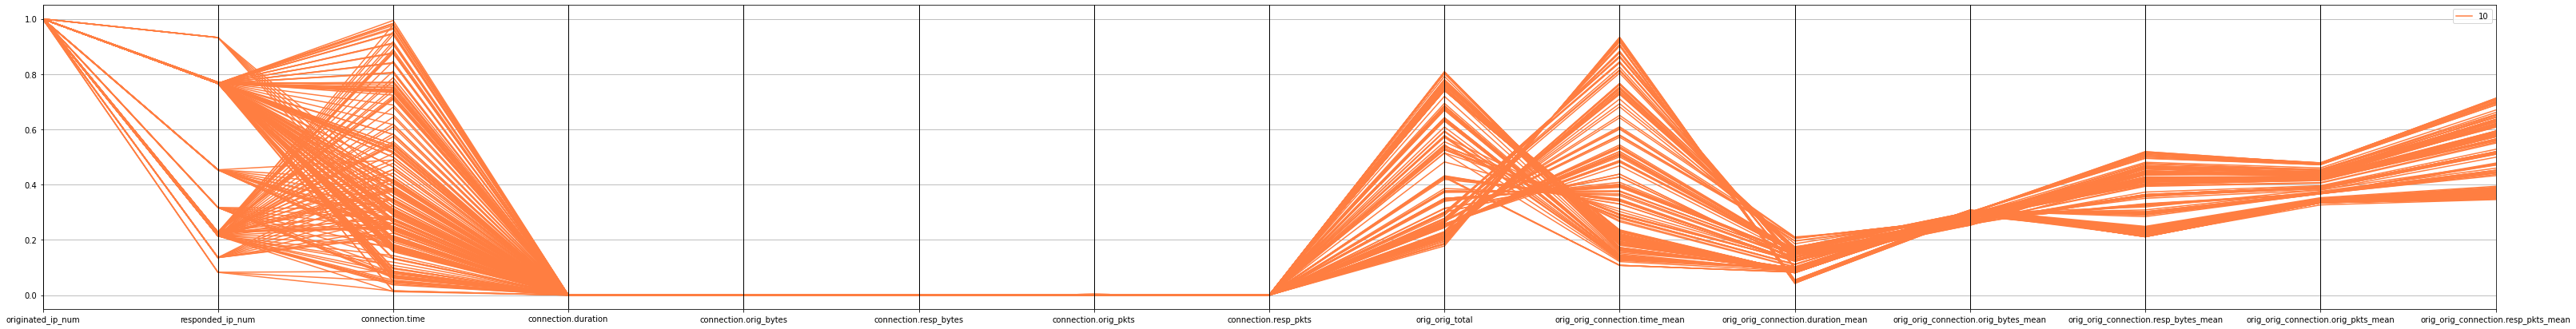

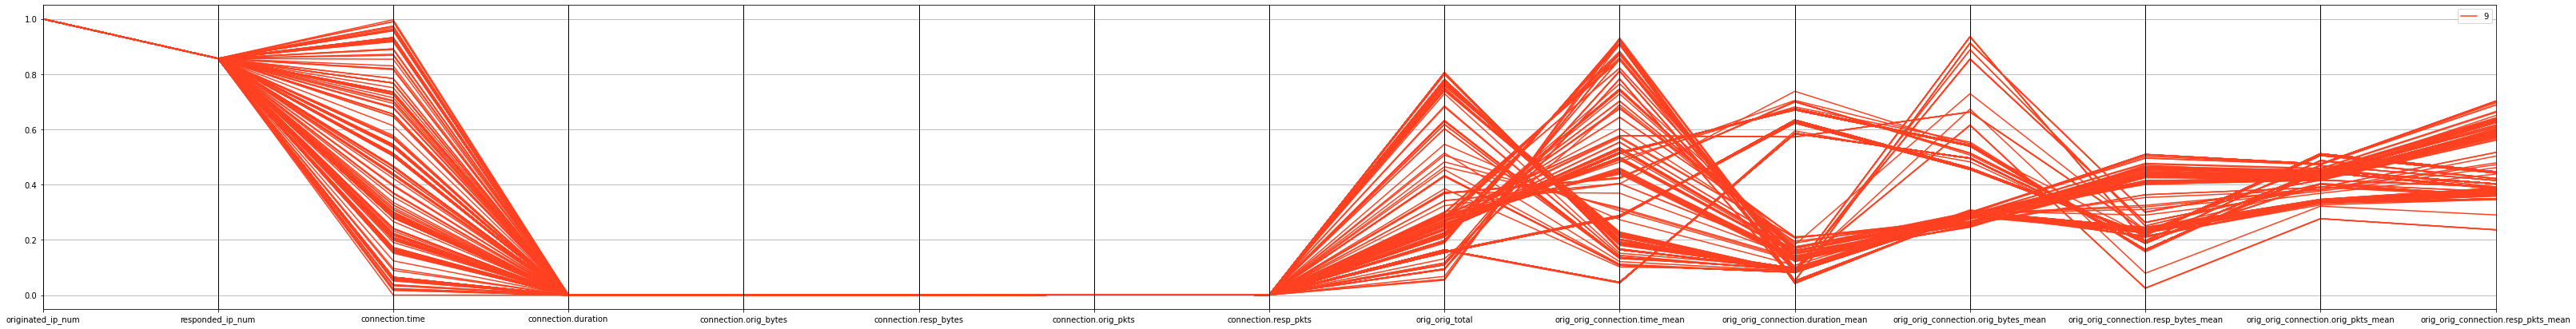

In [45]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()